# 掛載雲端硬碟

In [ ]:
#掛載雲端硬碟
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 匯入相關套件

In [ ]:
# Basic packages always been used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data preprocessing useful function
from sklearn.preprocessing import LabelEncoder

# Function for spilting training & testing data set
from sklearn.model_selection import train_test_split

# Algorithm
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Functions for evaluation
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score,roc_curve,auc
from sklearn.metrics import RocCurveDisplay
from imblearn.metrics import sensitivity_score
from imblearn.metrics import specificity_score

# figure
import seaborn as sns
# pipe
from sklearn.pipeline import Pipeline

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# 讀取檔案

In [ ]:
#load data(sometimes need to use "/")
df = pd.read_csv('/content/drive/MyDrive/ML_midterm_final/heart_failure_clinical_records.csv')
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,55.0,0,748,0,45,0,263358.03,1.3,137,1,1,88,0
1,65.0,0,56,0,25,0,305000.00,5.0,130,1,0,207,0
2,45.0,0,582,1,38,0,319000.00,0.9,140,0,0,244,0
3,60.0,1,754,1,40,1,328000.00,1.2,126,1,0,90,0
4,95.0,1,582,0,30,0,461000.00,2.0,132,1,0,50,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,45.0,0,582,1,55,0,543000.00,1.0,132,0,0,250,0
4996,60.0,1,582,0,30,1,127000.00,0.9,145,0,0,95,0
4997,95.0,1,112,0,40,1,196000.00,1.0,138,0,0,24,1
4998,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
df[df['time']==0]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT


# 預覽資料型態

In [ ]:
# 1.1 Easiest way to check data type and if there are any missing value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       5000 non-null   float64
 1   anaemia                   5000 non-null   int64  
 2   creatinine_phosphokinase  5000 non-null   int64  
 3   diabetes                  5000 non-null   int64  
 4   ejection_fraction         5000 non-null   int64  
 5   high_blood_pressure       5000 non-null   int64  
 6   platelets                 5000 non-null   float64
 7   serum_creatinine          5000 non-null   float64
 8   serum_sodium              5000 non-null   int64  
 9   sex                       5000 non-null   int64  
 10  smoking                   5000 non-null   int64  
 11  time                      5000 non-null   int64  
 12  DEATH_EVENT               5000 non-null   int64  
dtypes: float64(3), int64(10)
memory usage: 507.9 KB


# 資料轉型

In [ ]:
# Change data type
df['anaemia']=df['anaemia'].astype(str) #改成字串
df['diabetes']=df['diabetes'].astype(str) #改成字串
df['high_blood_pressure']=df['high_blood_pressure'].astype(str) #改成字串
df['sex']=df['sex'].astype(str) #改成字串
df['smoking']=df['smoking'].astype(str) #改成字串
df['DEATH_EVENT']=df['DEATH_EVENT'].astype(str) #改成字串
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       5000 non-null   float64
 1   anaemia                   5000 non-null   object 
 2   creatinine_phosphokinase  5000 non-null   int64  
 3   diabetes                  5000 non-null   object 
 4   ejection_fraction         5000 non-null   int64  
 5   high_blood_pressure       5000 non-null   object 
 6   platelets                 5000 non-null   float64
 7   serum_creatinine          5000 non-null   float64
 8   serum_sodium              5000 non-null   int64  
 9   sex                       5000 non-null   object 
 10  smoking                   5000 non-null   object 
 11  time                      5000 non-null   int64  
 12  DEATH_EVENT               5000 non-null   object 
dtypes: float64(3), int64(4), object(6)
memory usage: 507.9+ KB


# 描述性統計

In [ ]:
# 1.2 Show the correct descriptive statistics
#df.describe()
# Add include='all' to select all columns
df.describe(include='all')

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,5000.000000,5000,5000.000000,5000,5000.000000,5000,5000.000000,5000.000000,5000.000000,5000,5000,5000.000000,5000
unique,NaN,2,NaN,2,NaN,2,NaN,NaN,NaN,2,2,NaN,2
top,NaN,0,NaN,0,NaN,0,NaN,NaN,NaN,1,0,NaN,0
freq,NaN,2628,NaN,2803,NaN,3176,NaN,NaN,NaN,3228,3441,NaN,3432
mean,60.288736,NaN,586.760600,NaN,37.734600,NaN,265075.404370,1.369106,136.808200,NaN,NaN,130.678800,NaN
std,11.697243,NaN,976.733979,NaN,11.514855,NaN,97999.758622,1.009750,4.464236,NaN,NaN,77.325928,NaN
min,40.000000,NaN,23.000000,NaN,14.000000,NaN,25100.000000,0.500000,113.000000,NaN,NaN,4.000000,NaN
25%,50.000000,NaN,121.000000,NaN,30.000000,NaN,215000.000000,0.900000,134.000000,NaN,NaN,74.000000,NaN
50%,60.000000,NaN,248.000000,NaN,38.000000,NaN,263358.030000,1.100000,137.000000,NaN,NaN,113.000000,NaN
75%,68.000000,NaN,582.000000,NaN,45.000000,NaN,310000.000000,1.400000,140.000000,NaN,NaN,201.000000,NaN


In [ ]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,55.0,0,748,0,45,0,263358.03,1.3,137,1,1,88,0
1,65.0,0,56,0,25,0,305000.00,5.0,130,1,0,207,0
2,45.0,0,582,1,38,0,319000.00,0.9,140,0,0,244,0
3,60.0,1,754,1,40,1,328000.00,1.2,126,1,0,90,0
4,95.0,1,582,0,30,0,461000.00,2.0,132,1,0,50,1


## 類別型資料

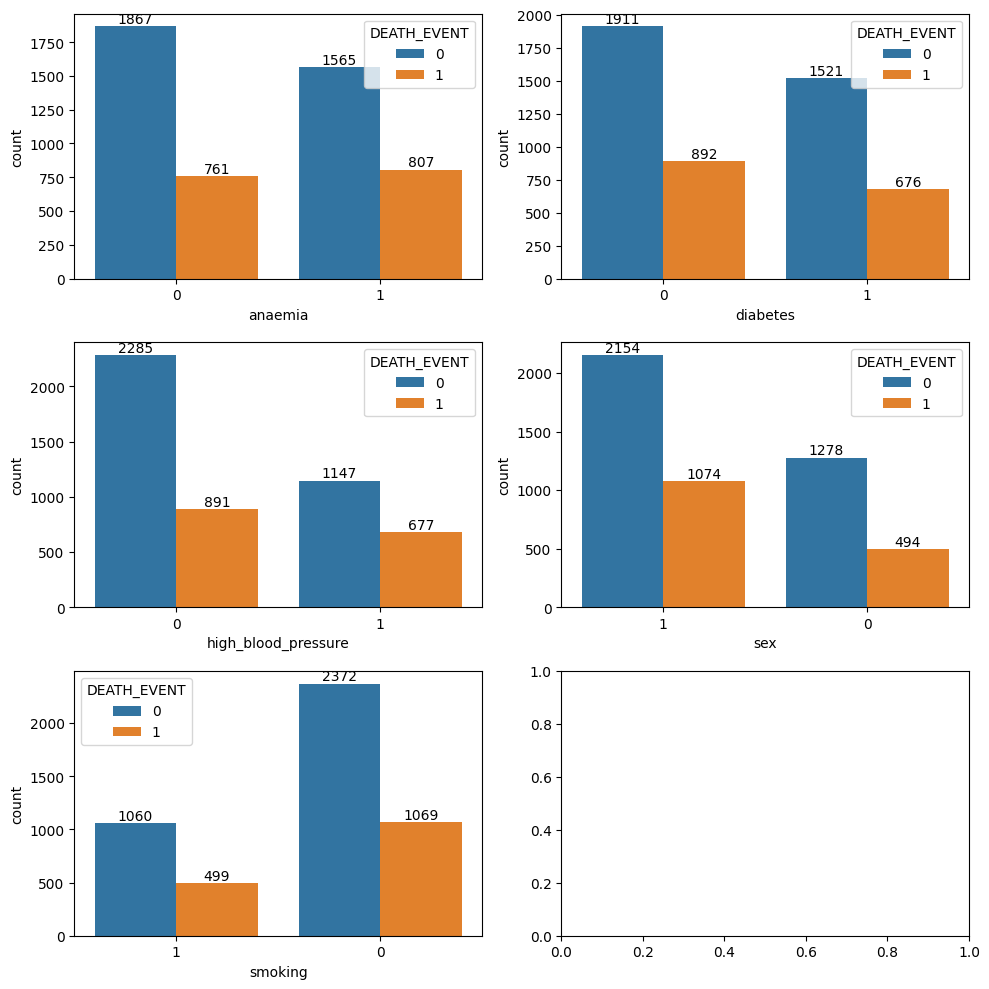

In [ ]:
# 查看類別型資料分布
fig,((ax1,ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(3, 2, figsize=(10, 10))
axes = [
    sns.countplot(x=df['anaemia'], hue=df['DEATH_EVENT'], ax=ax1),
    sns.countplot(x=df['diabetes'], hue=df['DEATH_EVENT'], ax=ax2),
    sns.countplot(x=df['high_blood_pressure'], hue=df['DEATH_EVENT'], ax=ax3),
    sns.countplot(x=df['sex'], hue=df['DEATH_EVENT'], ax=ax4),
    sns.countplot(x=df['smoking'], hue=df['DEATH_EVENT'], ax=ax5),
]
for ax in axes:
    for container in ax.containers:  # 獲取每個 bar container
        ax.bar_label(container, fmt='%d')  # 在 bar 上顯示數值


plt.tight_layout()  # 調整布局避免重疊
plt.show()

In [ ]:
df['DEATH_EVENT']=df['DEATH_EVENT'].astype(int)

In [ ]:
# 計算每個 'anaemia' 狀態下 'DEATH_EVENT' 為 0 的百分比
anaemia_death = df.groupby('anaemia')['DEATH_EVENT'].apply(lambda x: round((x == 1).mean() * 100, 2)).reset_index(name='anaemia_death_per')
# 計算每個 'diabetes' 狀態下 'DEATH_EVENT' 為 0 的百分比
diabetes_death = df.groupby('diabetes')['DEATH_EVENT'].apply(lambda x: round((x == 1).mean() * 100, 2)).reset_index(name='diabetes_death_per')
# 計算每個 'high_blood_pressure' 狀態下 'DEATH_EVENT' 為 1 的百分比
high_blood_pressure_death = df.groupby('high_blood_pressure')['DEATH_EVENT'].apply(lambda x: round((x == 1).mean() * 100, 2)).reset_index(name='high_blood_pressure_death_per')
# 計算每個 'sex' 狀態下 'DEATH_EVENT' 為 0 的百分比
sex_death = df.groupby('sex')['DEATH_EVENT'].apply(lambda x: round((x == 1).mean() * 100, 2)).reset_index(name='sex_death_per')
# 計算每個 'smoking' 狀態下 'DEATH_EVENT' 為 0 的百分比
smoking_death = df.groupby('smoking')['DEATH_EVENT'].apply(lambda x: round((x == 1).mean() * 100, 2)).reset_index(name='smoking_death_per')




# # 使用join合併這些DataFrame
# result_df = anaemia_survival.set_index('anaemia').join(
#     diabetes_survival.set_index('diabetes'),
#     how='outer'
# ).join(
#     high_blood_pressure_survival.set_index('high_blood_pressure'),
#     how='outer'
# ).join(
#     sex_survival.set_index('sex'),
#     how='outer'
# ).join(
#     smoking_survival.set_index('smoking'),
#     how='outer'
# )
# # 重置索引並重命名 'anaemia' 欄位為 'cat'
# result_df = result_df.reset_index()
# result_df = result_df.rename(columns={'anaemia': 'cat'})
# # 顯示結果
# result_df


,sex_death_per
sex,
0,27.88
1,33.27


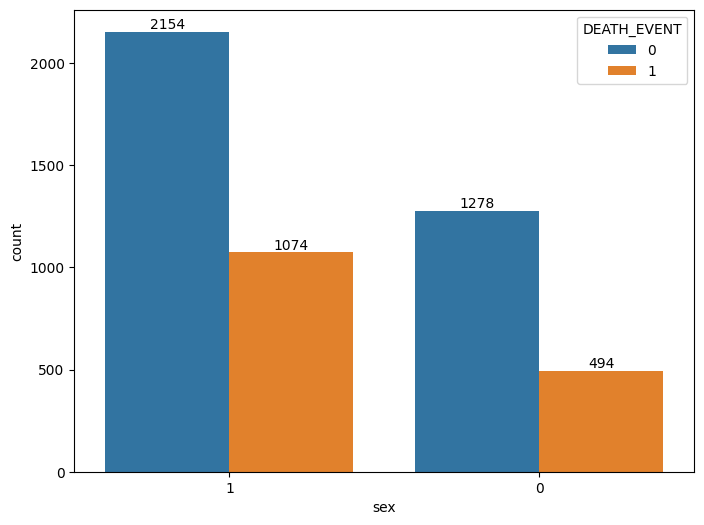

In [ ]:
fig, ax1 = plt.subplots(figsize=(8, 6))
# 繪製 countplot
sns.countplot(x=df['sex'], hue=df['DEATH_EVENT'], ax=ax1)

# 在每個條形上加上數字標籤
for container in ax1.containers:
    ax1.bar_label(container, fmt='%d')  # '%d' 用來顯示整數格式的數字
df_sex_death=sex_death.set_index('sex')
df_sex_death

,smoking_death_per
smoking,
0,31.07
1,32.01


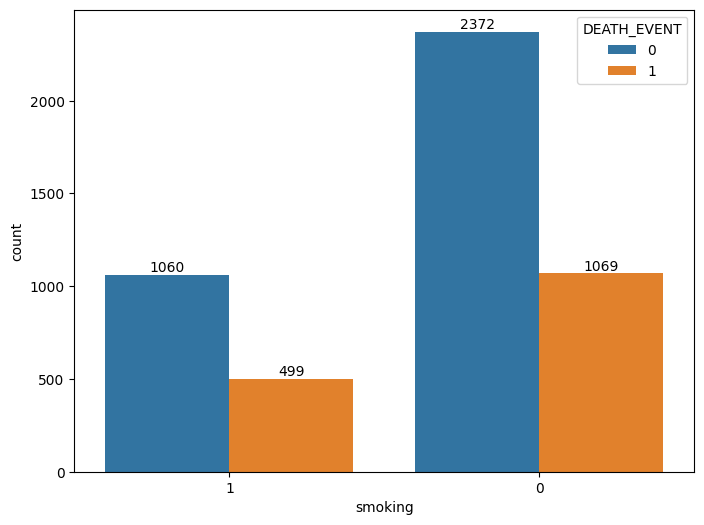

In [ ]:
fig, ax2 = plt.subplots(figsize=(8, 6))
# 繪製 countplot
sns.countplot(x=df['smoking'], hue=df['DEATH_EVENT'], ax=ax2)

# 在每個條形上加上數字標籤
for container in ax2.containers:
    ax2.bar_label(container, fmt='%d')  # '%d' 用來顯示整數格式的數字
df_smoking=smoking_death.set_index('smoking')
df_smoking

,high_blood_pressure_death_per
high_blood_pressure,
0,28.05
1,37.12


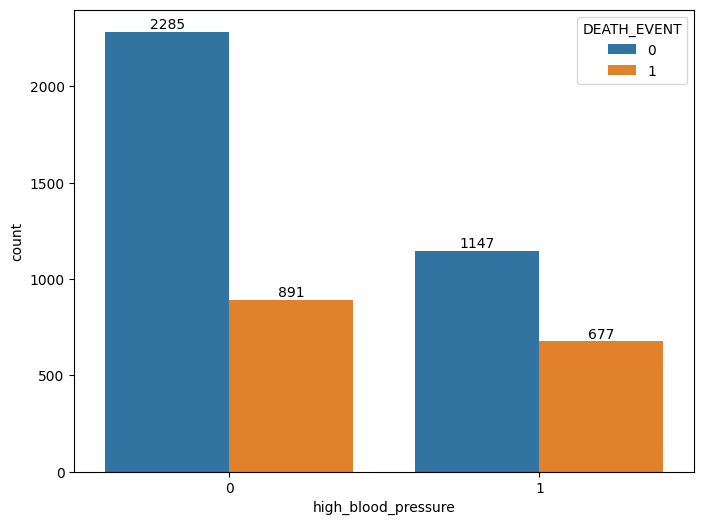

In [ ]:
fig, ax3 = plt.subplots(figsize=(8, 6))
# 繪製 countplot
sns.countplot(x=df['high_blood_pressure'], hue=df['DEATH_EVENT'], ax=ax3)

# 在每個條形上加上數字標籤
for container in ax3.containers:
    ax3.bar_label(container, fmt='%d')  # '%d' 用來顯示整數格式的數字
df_high_blood_pressure_death=high_blood_pressure_death.set_index('high_blood_pressure')
df_high_blood_pressure_death

,anaemia_death_per
anaemia,
0,28.96
1,34.02


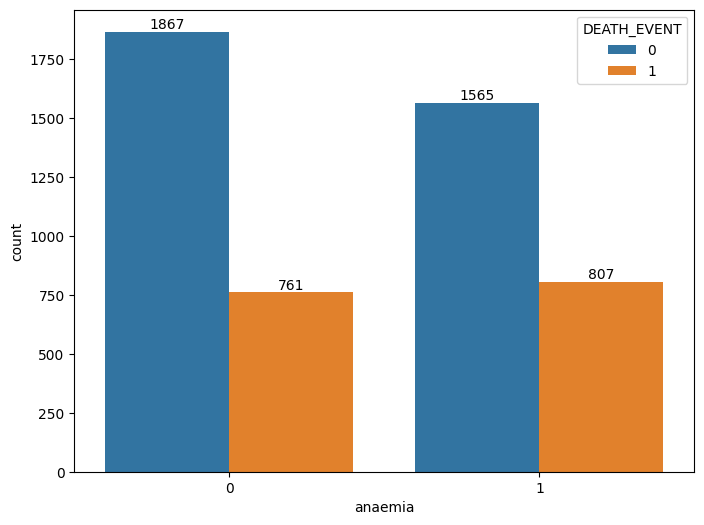

In [ ]:
fig, ax4 = plt.subplots(figsize=(8, 6))

# 繪製 countplot
sns.countplot(x=df['anaemia'], hue=df['DEATH_EVENT'], ax=ax4)

# 在每個條形上加上數字標籤
for container in ax4.containers:
    ax4.bar_label(container, fmt='%d')  # '%d' 用來顯示整數格式的數字

df_anaemia=anaemia_death.set_index('anaemia')
df_anaemia

,diabetes_death_per
diabetes,
0,31.82
1,30.77


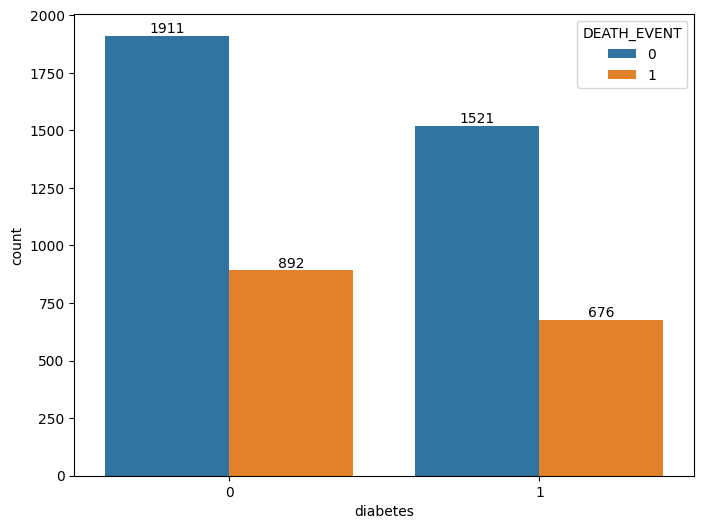

In [ ]:
fig, ax5 = plt.subplots(figsize=(8, 6))
# 繪製 countplot
sns.countplot(x=df['diabetes'], hue=df['DEATH_EVENT'], ax=ax5)

# 在每個條形上加上數字標籤
for container in ax5.containers:
    ax5.bar_label(container, fmt='%d')  # '%d' 用來顯示整數格式的數字
df_diabetes=diabetes_death.set_index('diabetes')
df_diabetes

## 數值型資料

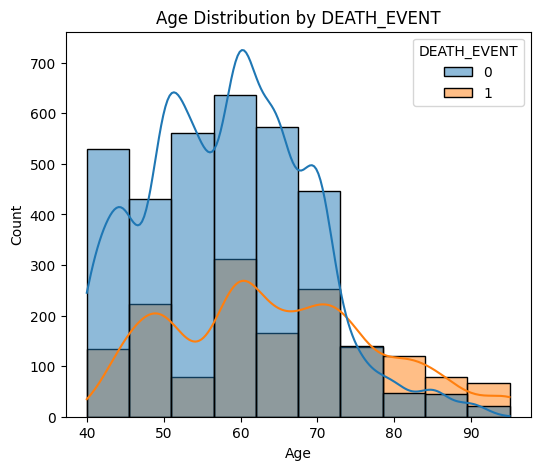

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# 年齡與存活率
fig, ax = plt.subplots(figsize=(6, 5))
sns.histplot(data=df, x='age', hue='DEATH_EVENT', bins=10, kde=True,alpha=0.5, stat='count', ax=ax)
plt.title('Age Distribution by DEATH_EVENT')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

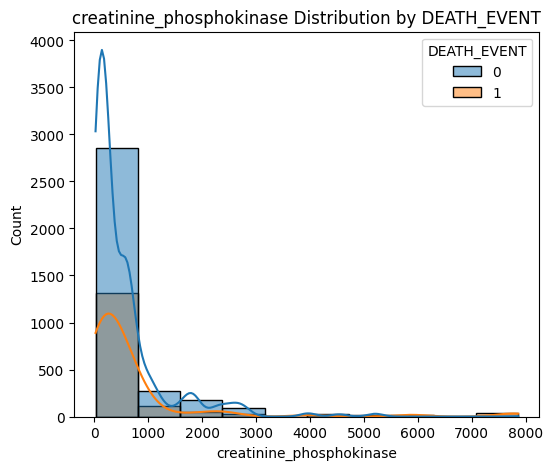

In [ ]:
# 肌酸磷酸激酶 (CPK)與存活率
fig, ax = plt.subplots(figsize=(6, 5))
sns.histplot(data=df, x='creatinine_phosphokinase', hue='DEATH_EVENT', bins=10, kde=True,alpha=0.5, stat='count', ax=ax)
plt.title('creatinine_phosphokinase Distribution by DEATH_EVENT')
plt.xlabel('creatinine_phosphokinase')
plt.ylabel('Count')
plt.show()

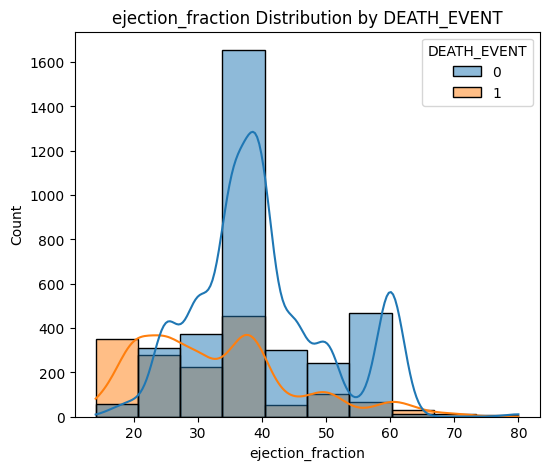

In [ ]:
# 射血分數與存活率
fig, ax = plt.subplots(figsize=(6, 5))
sns.histplot(data=df, x='ejection_fraction', hue='DEATH_EVENT', bins=10, kde=True,alpha=0.5, stat='count', ax=ax)
plt.title('ejection_fraction Distribution by DEATH_EVENT')
plt.xlabel('ejection_fraction')
plt.ylabel('Count')
plt.show()

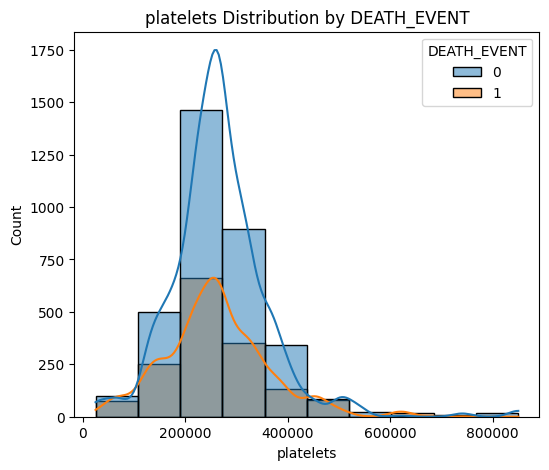

In [ ]:
# 血小板與存活率
fig, ax = plt.subplots(figsize=(6, 5))
sns.histplot(data=df, x='platelets', hue='DEATH_EVENT', bins=10, kde=True,alpha=0.5, stat='count', ax=ax)
plt.title('platelets Distribution by DEATH_EVENT')
plt.xlabel('platelets')
plt.ylabel('Count')
plt.show()

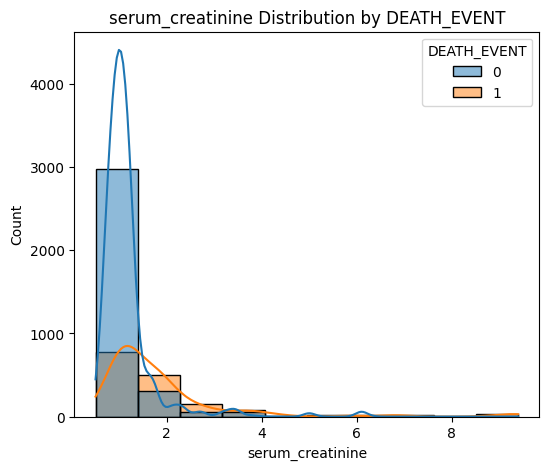

In [ ]:
# 血清肌酸酐與存活率
fig, ax = plt.subplots(figsize=(6, 5))
sns.histplot(data=df, x='serum_creatinine', hue='DEATH_EVENT', bins=10, kde=True,alpha=0.5, stat='count', ax=ax)
plt.title('serum_creatinine Distribution by DEATH_EVENT')
plt.xlabel('serum_creatinine')
plt.ylabel('Count')
plt.show()

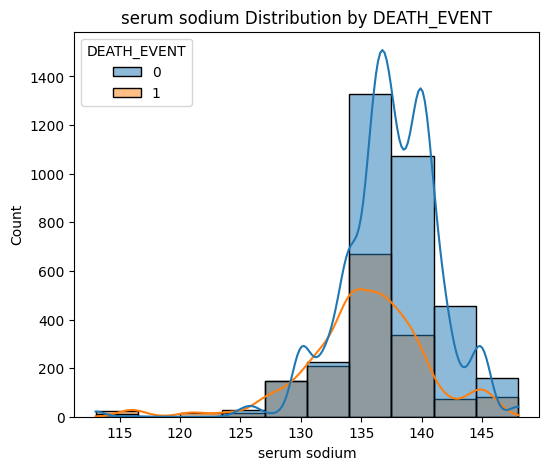

In [ ]:
# 血清鈉與存活率
fig, ax = plt.subplots(figsize=(6, 5))
sns.histplot(data=df, x='serum_sodium', hue='DEATH_EVENT', bins=10, kde=True,alpha=0.5, stat='count', ax=ax)
# Show the plot
plt.title('serum sodium Distribution by DEATH_EVENT')
plt.xlabel('serum sodium')
plt.ylabel('Count')
plt.show()

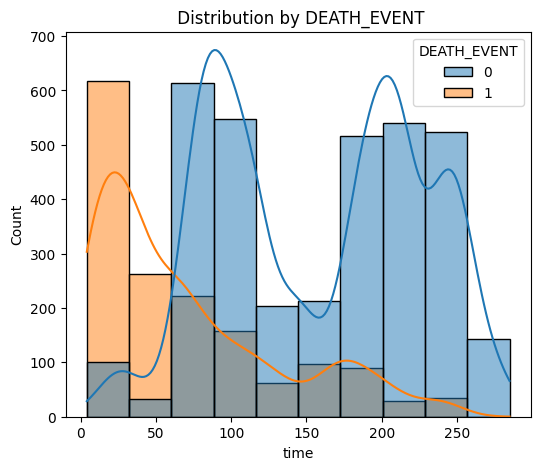

In [ ]:
# 追蹤時間與存活率
fig, ax = plt.subplots(figsize=(6, 5))
sns.histplot(data=df, x='time', hue='DEATH_EVENT', bins=10, kde=True,alpha=0.5, stat='count', ax=ax)
# Show the plot
plt.title(' Distribution by DEATH_EVENT')
plt.xlabel('time')
plt.ylabel('Count')
plt.show()

In [ ]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,55.0,0,748,0,45,0,263358.03,1.3,137,1,1,88,0
1,65.0,0,56,0,25,0,305000.00,5.0,130,1,0,207,0
2,45.0,0,582,1,38,0,319000.00,0.9,140,0,0,244,0
3,60.0,1,754,1,40,1,328000.00,1.2,126,1,0,90,0
4,95.0,1,582,0,30,0,461000.00,2.0,132,1,0,50,1


In [ ]:
from sklearn.feature_selection import SelectPercentile, f_classif

# 取出特徵與目標變數
X = df.loc[:,'age':'time']

# hasType2 為目標變數
y = df['DEATH_EVENT']

# 選取前 50% F值最高的特徵 (變異數分析 ANOVA f-value)
selector = SelectPercentile(f_classif, percentile=50)

# 選取特徵
X_pbest = selector.fit_transform(X, y)

# 找出選取的特徵
selected_features = X.columns[selector.get_support()]

# # 選出 前 5 筆資料
print(X_pbest[:5,:])

# 輸出 F值與 p值
print(f_classif(X, y))
'''
F 值愈高，代表特徵與目標變數的相關性愈高，
相關性愈高，則該特徵愈有可能被選取。
p-value 愈高，代表該特徵與目標變數的相關性愈低。
'''

# 預覽前 5 筆資料
X[selected_features].head(5)

[[55.0 45 '0' 1.3 137 88]
 [65.0 25 '0' 5.0 130 207]
 [45.0 38 '0' 0.9 140 244]
 [60.0 40 '1' 1.2 126 90]
 [95.0 30 '0' 2.0 132 50]]
(array([3.31615272e+02, 1.48941361e+01, 3.19551871e+01, 6.35244353e-01,
       4.68324626e+02, 4.45779008e+01, 4.97087065e+00, 5.36246991e+02,
       2.72428953e+02, 1.55006378e+01, 4.41353739e-01, 1.92420817e+03]), array([8.57296519e-072, 1.15149728e-004, 1.66525545e-008, 4.25476011e-001,
       2.37767561e-099, 2.71011075e-011, 2.58219303e-002, 8.85337802e-113,
       1.23882050e-059, 8.35991859e-005, 5.06500433e-001, 0.00000000e+000]))


,age,ejection_fraction,high_blood_pressure,serum_creatinine,serum_sodium,time
0,55.0,45,0,1.3,137,88
1,65.0,25,0,5.0,130,207
2,45.0,38,0,0.9,140,244
3,60.0,40,1,1.2,126,90
4,95.0,30,0,2.0,132,50


In [ ]:
from sklearn.feature_selection import SelectPercentile, f_classif

# 取出特徵與目標變數
X = df.loc[:, 'age':'time']

# DEATH_EVENT 為目標變數
y = df['DEATH_EVENT']

# 選取前 50% F值最高的特徵 (變異數分析 ANOVA f-value)
selector = SelectPercentile(f_classif, percentile=50)

# 選取特徵
X_pbest = selector.fit_transform(X, y)

# 找出選取的特徵
selected_features = X.columns[selector.get_support()]
print("選取的特徵:", selected_features)

# 輸出 F值與 p值
F_values, p_values = f_classif(X, y)
print("F值:", F_values)
print("p值:", p_values)

# 預覽前 5 筆資料
X[selected_features].head(5)


選取的特徵: Index(['age', 'ejection_fraction', 'high_blood_pressure', 'serum_creatinine',
       'serum_sodium', 'time'],
      dtype='object')
F值: [3.31615272e+02 1.48941361e+01 3.19551871e+01 6.35244353e-01
 4.68324626e+02 4.45779008e+01 4.97087065e+00 5.36246991e+02
 2.72428953e+02 1.55006378e+01 4.41353739e-01 1.92420817e+03]
p值: [8.57296519e-072 1.15149728e-004 1.66525545e-008 4.25476011e-001
 2.37767561e-099 2.71011075e-011 2.58219303e-002 8.85337802e-113
 1.23882050e-059 8.35991859e-005 5.06500433e-001 0.00000000e+000]


,age,ejection_fraction,high_blood_pressure,serum_creatinine,serum_sodium,time
0,55.0,45,0,1.3,137,88
1,65.0,25,0,5.0,130,207
2,45.0,38,0,0.9,140,244
3,60.0,40,1,1.2,126,90
4,95.0,30,0,2.0,132,50


# 方法一：用for迴圈找超參數

# 資料前處理

## 類別型資料編碼

In [ ]:
dummied_df = df.copy()
dummied_df = pd.get_dummies(
          dummied_df,columns=['anaemia','diabetes','high_blood_pressure','sex','smoking','DEATH_EVENT'],
          dtype=int).copy()
dummied_df.head()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time,anaemia_0,anaemia_1,diabetes_0,diabetes_1,high_blood_pressure_0,high_blood_pressure_1,sex_0,sex_1,smoking_0,smoking_1,DEATH_EVENT_0,DEATH_EVENT_1
0,55.0,748,45,263358.03,1.3,137,88,1,0,1,0,1,0,0,1,0,1,1,0
1,65.0,56,25,305000.00,5.0,130,207,1,0,1,0,1,0,0,1,1,0,1,0
2,45.0,582,38,319000.00,0.9,140,244,1,0,0,1,1,0,1,0,1,0,1,0
3,60.0,754,40,328000.00,1.2,126,90,0,1,0,1,0,1,0,1,1,0,1,0
4,95.0,582,30,461000.00,2.0,132,50,0,1,1,0,1,0,0,1,1,0,0,1


## 正規化(MinMaxScaler)

In [ ]:
# normalization
from sklearn.preprocessing import MinMaxScaler
#set x (make prediction) with minimax
x=dummied_df.drop(['DEATH_EVENT_0','DEATH_EVENT_1','time'],axis=1).copy()
#minimax scaling
MMscaler=MinMaxScaler(feature_range=(0, 1))
scaling=MMscaler.fit_transform(x)
scaled_data=pd.DataFrame(data=scaling)
scaled_data.columns=['age', 'creatinine_phosphokinase', 'ejection_fraction','platelets','serum_creatinine', 'serum_sodium','anaemia_0','anaemia_1', 'diabetes_0','diabetes_1', 'high_blood_pressure_0','high_blood_pressure_1','sex_0','sex_1','smoking_0','smoking_1']
scaled_data.head()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,anaemia_0,anaemia_1,diabetes_0,diabetes_1,high_blood_pressure_0,high_blood_pressure_1,sex_0,sex_1,smoking_0,smoking_1
0,0.272727,0.092498,0.469697,0.288833,0.089888,0.685714,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
1,0.454545,0.004210,0.166667,0.339314,0.505618,0.485714,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
2,0.090909,0.071319,0.363636,0.356286,0.044944,0.771429,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
3,0.363636,0.093264,0.393939,0.367196,0.078652,0.371429,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
4,1.000000,0.071319,0.242424,0.528428,0.168539,0.542857,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


## 標準化(Standardization)

In [ ]:
#set x (make prediction) with minimax
x=df.drop(['DEATH_EVENT_0','DEATH_EVENT_1','time'],axis=1).copy()
#StandardScaler
scalar = StandardScaler()
scaling=scalar.fit_transform(x)
scaled_data=pd.DataFrame(data=scaling)
scaled_data.columns=['age', 'creatinine_phosphokinase', 'ejection_fraction','platelets','serum_creatinine', 'serum_sodium','anaemia_0','anaemia_1', 'diabetes_0','diabetes_1', 'high_blood_pressure_0','high_blood_pressure_1','sex_0','sex_1','smoking_0','smoking_1']
scaled_data.head()

KeyError: "['DEATH_EVENT_0', 'DEATH_EVENT_1'] not found in axis"

In [ ]:
#set y (want to predict)
y=dummied_df['DEATH_EVENT_1'].copy()
y.head()

,DEATH_EVENT_1
0,0
1,0
2,0
3,0
4,1


# 切分資料

In [ ]:
# 切分訓練與測試資料
x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,
    test_size=0.2,
    random_state=6
)

# 觀看數據集、訓練與測試集的類別比例
df_count = pd.concat(
    [y.value_counts(), y_train.value_counts(), y_test.value_counts()],
    axis=1
)

# 設定欄位名稱
df_count.columns = ['y_count', 'y_train_count', 'y_test_count']

# 顯示數據集、訓練與測試集的類別比例
df_count.head(5)

,y_count,y_train_count,y_test_count
DEATH_EVENT_1,,,
0,3432,2762,670
1,1568,1238,330


In [ ]:
x_train

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,anaemia_0,anaemia_1,diabetes_0,diabetes_1,high_blood_pressure_0,high_blood_pressure_1,sex_0,sex_1,smoking_0,smoking_1
501,60.0,582,40,242000.0,3.7,134,1,0,1,0,1,0,0,1,1,0
1555,49.0,972,35,268000.0,0.8,130,1,0,0,1,0,1,1,0,1,0
776,55.0,2017,35,141000.0,1.0,140,1,0,1,0,0,1,0,1,1,0
191,45.0,582,45,324000.0,0.9,140,1,0,1,0,1,0,1,0,1,0
4091,53.0,207,40,223000.0,1.2,130,1,0,0,1,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,53.0,270,50,248000.0,1.1,148,0,1,1,0,1,0,0,1,1,0
4714,64.0,62,60,309000.0,1.5,135,0,1,1,0,1,0,1,0,1,0
2004,50.0,121,40,260000.0,0.7,130,0,1,0,1,1,0,0,1,1,0
227,90.0,337,40,279000.0,0.8,141,0,1,1,0,1,0,0,1,1,0


# DecisionTree

In [ ]:
# 4.1 Fit the model with DecisionTreeClassifier function
DTmodel=DecisionTreeClassifier(criterion='gini',max_depth=None,max_leaf_nodes=None,min_samples_leaf=1,random_state=6)
DTmodel.fit(x_train,y_train)

DecisionTreeClassifier(random_state=6)

In [ ]:
# 4.2 Show result: out-of-sample testing
# Training result
training_prediction=DTmodel.predict(x_train)
# Accuracy
training_acc=accuracy_score(y_train,training_prediction)
# f1 score
training_f1s=f1_score(y_train,training_prediction,pos_label=1)
# precision
training_pre=precision_score(y_train,training_prediction,pos_label=1)
#sensitivity
training_sen=recall_score(y_train,training_prediction,pos_label=1)
#specificity
training_spe=recall_score(y_train,training_prediction,pos_label=0)
#confusion matrix
training_cm=confusion_matrix(y_train,training_prediction)

# Testing result
testing_prediction=DTmodel.predict(x_test)
testing_acc=accuracy_score(y_test,testing_prediction)
testing_f1s=f1_score(y_test,testing_prediction,pos_label=1)
testing_pre=precision_score(y_test,testing_prediction,pos_label=1)
testing_sen=recall_score(y_test,testing_prediction,pos_label=1)
testing_spe=recall_score(y_test,testing_prediction,pos_label=0)
testing_cm=confusion_matrix(y_test,testing_prediction)

# print result
print('Training result:')
print('Training ACC:',round(training_acc*100,2))
print('Training f1s:',round(training_f1s*100,2))
print('Training pre:',round(training_pre*100,2))
print('Training sen:',round(training_sen*100,2))
print('Training spe:',round(training_spe*100,2))
print('')
print('Training confusion matrix:')
print(training_cm)
print('+-----------------------------------------+')
print('Testing result:')
print('Testing ACC:',round(testing_acc*100,2))
print('Testing f1s:',round(testing_f1s*100,2))
print('Testing pre:',round(testing_pre*100,2))
print('Testing sen:',round(testing_sen*100,2))
print('Testing spe:',round(testing_spe*100,2))
print('')
print('Testing confusion matrix:')
print(testing_cm)

Training result:
Training ACC: 99.98
Training f1s: 99.96
Training pre: 100.0
Training sen: 99.92
Training spe: 100.0

Training confusion matrix:
[[2762    0]
 [   1 1237]]
+-----------------------------------------+
Testing result:
Testing ACC: 97.7
Testing f1s: 96.47
Testing pre: 97.82
Testing sen: 95.15
Testing spe: 98.96

Testing confusion matrix:
[[663   7]
 [ 16 314]]


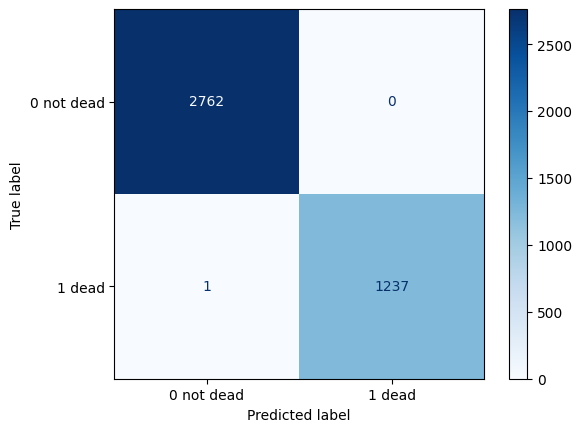

In [ ]:
# Training confusion matrix混淆矩陣ppt要放
ConfusionMatrixDisplay(training_cm,display_labels=["0 not dead","1 dead"]).plot(cmap=plt.cm.Blues)

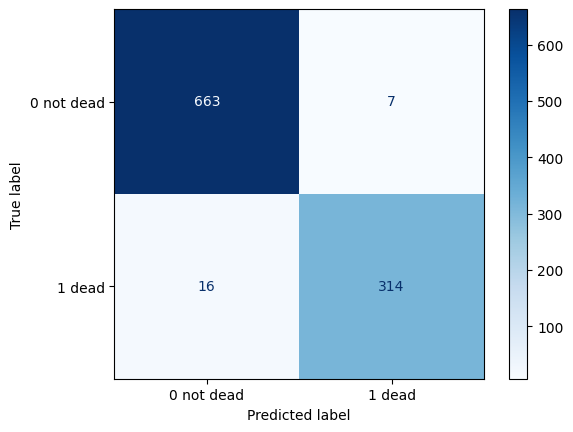

In [ ]:
# Testing confusion matrix
ConfusionMatrixDisplay(testing_cm,display_labels=["0 not dead","1 dead"]).plot(cmap=plt.cm.Blues)

 DTmodel_max_depth: 16
 DTmodel_max_leaf_nodes: 151


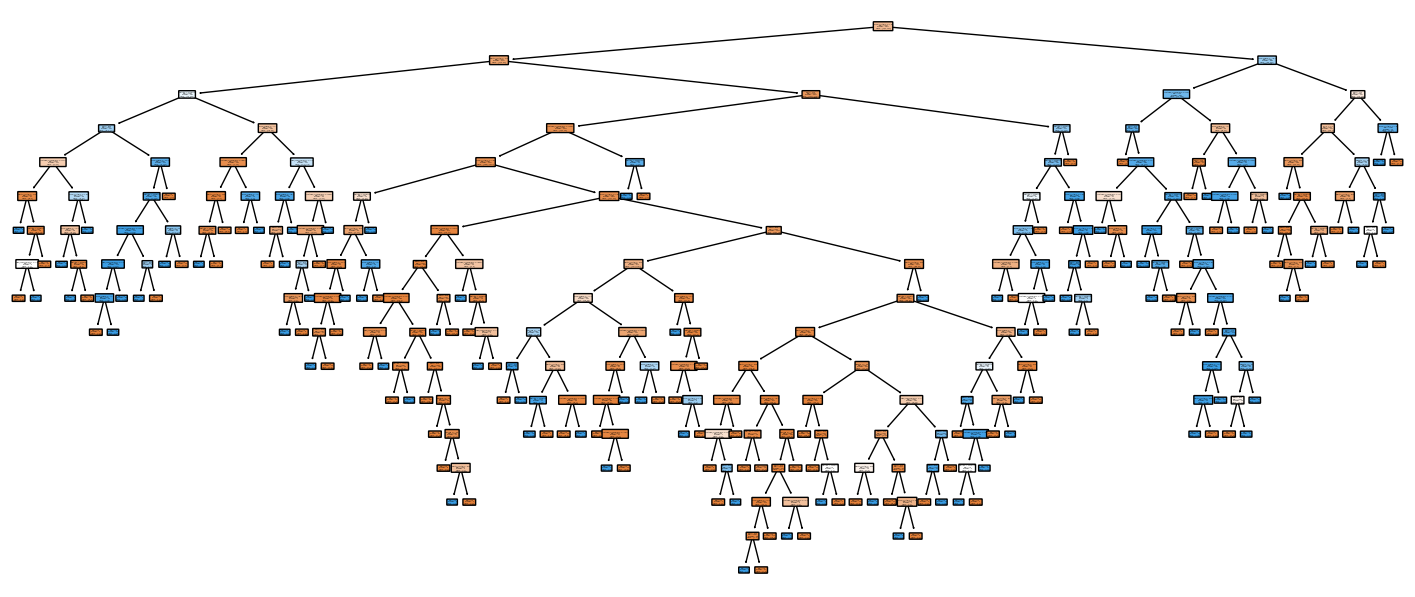

In [ ]:
# Plot tree
plt.figure(figsize=(18,7.5))
tree.plot_tree(DTmodel,filled=True,rounded=True,class_names=["not dead","dead"],feature_names=x.columns);
print(f" DTmodel_max_depth: {DTmodel.get_depth()}")
print(f" DTmodel_max_leaf_nodes: {DTmodel.get_n_leaves()}")

特徵重要性： [1.78456121e-01 1.11169182e-01 1.60818334e-01 9.71078077e-02
 2.34645095e-01 1.24923079e-01 1.34021241e-02 2.83900496e-04
 4.69708742e-03 2.60355956e-02 1.03224444e-02 1.26311458e-02
 1.44922647e-02 0.00000000e+00 1.09216829e-02 9.41354277e-05]
特徵名稱： Index(['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets',
       'serum_creatinine', 'serum_sodium', 'anaemia_0', 'anaemia_1',
       'diabetes_0', 'diabetes_1', 'high_blood_pressure_0',
       'high_blood_pressure_1', 'sex_0', 'sex_1', 'smoking_0', 'smoking_1'],
      dtype='object')


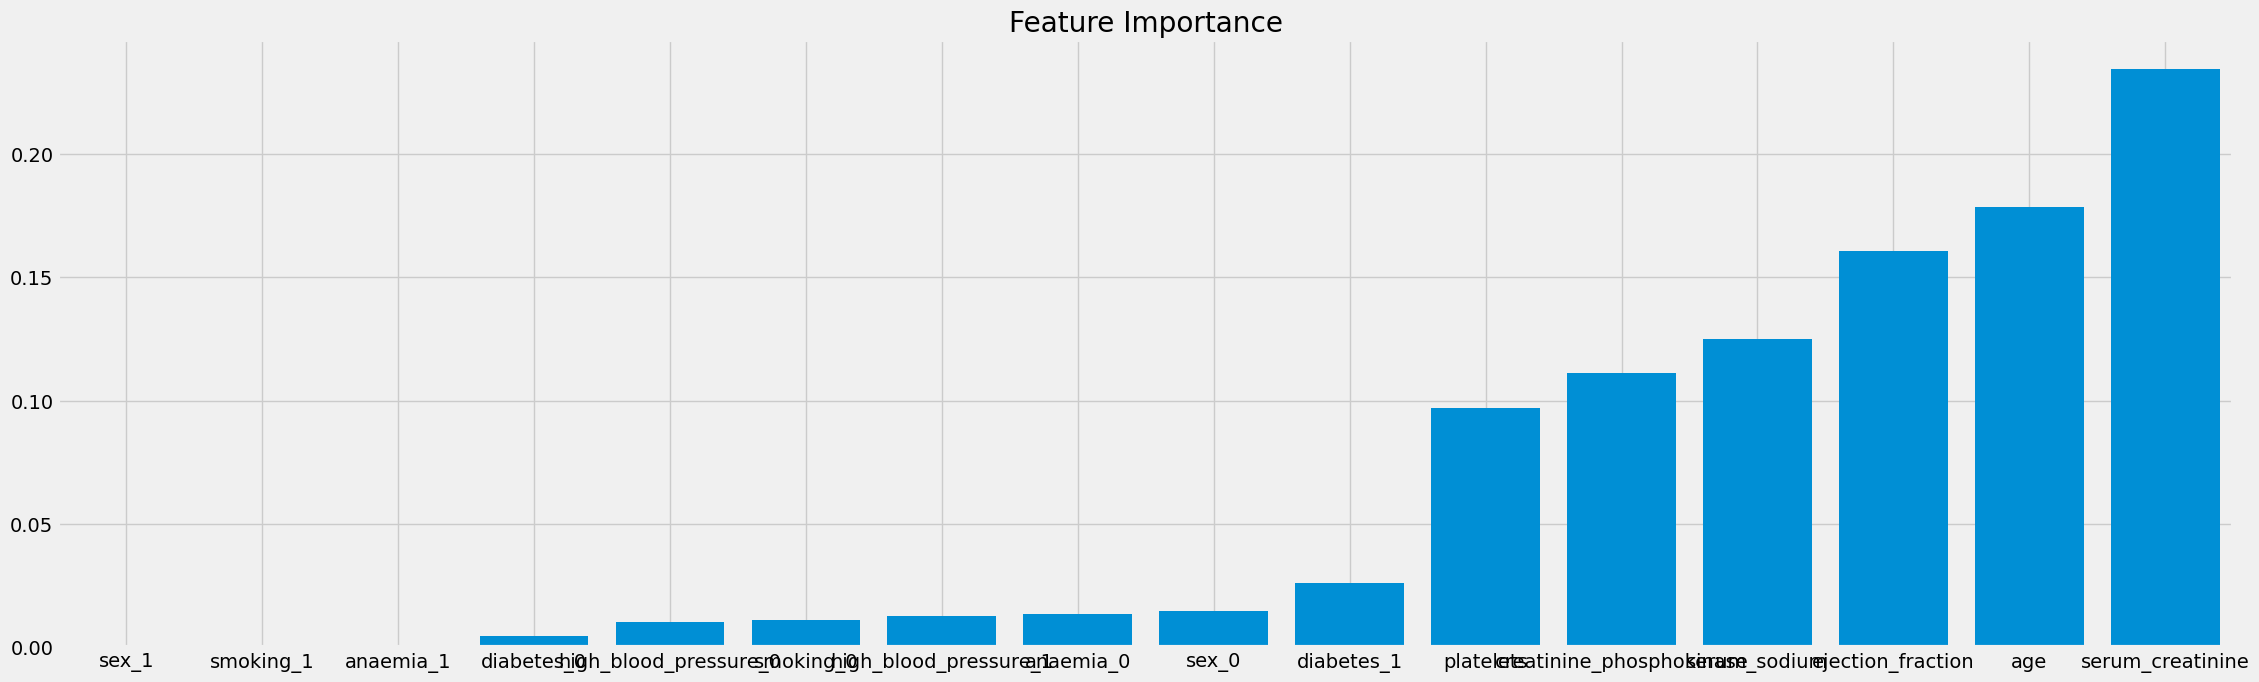

In [ ]:
import numpy as np
plt.style.use('fivethirtyeight')

print('特徵重要性：', DTmodel.feature_importances_)
print('特徵名稱：', x.columns)

# 取出特徵重要性與排序後的索引值
idx = np.argsort(DTmodel.feature_importances_)

# 放置柱狀圖的橫軸位置
tree_indices = np.arange(0, len(DTmodel.feature_importances_)) + 0.5

# 由小到大繪製特徵重要性的柱狀圖
plt.figure(figsize=(25,7.5))
plt.bar(tree_indices, DTmodel.feature_importances_[idx])
plt.xticks(tree_indices, labels=x.columns[idx], fontsize=14)
plt.xlim((0, len(DTmodel.feature_importances_)))
plt.title('Feature Importance')
plt.show()

## 找超參數

In [ ]:
# 5.2 Manually peforming hyper parameter tuning
results = []
for random_state in [6,60,600]:
  Best_Valid_acc = 0
  x_train_tuning,X_valid,y_train_tuning,y_valid=train_test_split(x,y,test_size=0.2,random_state=random_state)
  for max_depth in [5,9,10]:
    for max_leaf_nodes in [5,9,10]:
      model_cart=DecisionTreeClassifier(criterion='gini',max_depth=max_depth,max_leaf_nodes=max_leaf_nodes,min_samples_leaf=1,random_state=6)
      model_cart.fit(x_train_tuning,y_train_tuning)
      prediction=model_cart.predict(X_valid)
      Valid_acc=accuracy_score(y_valid,prediction)
      # param = {
      #     'random_state':random_state,
      #     'max_depth':max_depth,
      #     'max_leaf_nodes':max_leaf_nodes
      # }
      # 收集每次的結果
      results.append({
          'random_state': random_state,
          'max_depth': max_depth,
          'max_leaf_nodes': max_leaf_nodes,
          'Valid_ACC': round(Valid_acc * 100, 2)
      })
# 將結果轉換為 DataFrame
results_df = pd.DataFrame(results)

# 查看結果
results_df


,random_state,max_depth,max_leaf_nodes,Valid_ACC
0,6,5,5,80.4
1,6,5,9,82.6
2,6,5,10,83.2
3,6,9,5,80.4
4,6,9,9,82.6
5,6,9,10,83.2
6,6,10,5,80.4
7,6,10,9,82.6
8,6,10,10,83.2
9,60,5,5,78.0


## 取三次平均

In [ ]:
import pandas as pd
# 假設 results_df 已经存在並包含相關數據
results_df['random_state'] = [6, 60, 600] * (len(results_df) // 3)
# 新增 'group' 列，每 9 行循環分配 1 到 7
results_df['group'] = [i % 9 + 1 for i in range(27)]
# 按 'group' 分组，對各列進行相加後取平均
aggregated_df = results_df.groupby('group').mean().reset_index()
# 四捨五入到小數點後兩位
aggregated_df = aggregated_df.round(4)
aggregated_df

,group,random_state,max_depth,max_leaf_nodes,Valid_ACC
0,1,6.0,5.0,5.0,79.4000
1,2,60.0,5.0,9.0,82.1333
2,3,600.0,5.0,10.0,82.6333
3,4,6.0,9.0,5.0,79.4000
4,5,60.0,9.0,9.0,82.1333
5,6,600.0,9.0,10.0,82.6333
6,7,6.0,10.0,5.0,79.4000
7,8,60.0,10.0,9.0,82.1333
8,9,600.0,10.0,10.0,82.6333


找到最佳超參數

In [ ]:
# 找到最佳Valid_ACC那一筆
best_valid_acc_row = aggregated_df.loc[aggregated_df['Valid_ACC'].idxmax()]
# 取出最佳Valid_ACC的超參數值
best_max_depth = int(best_valid_acc_row['max_depth'])
max_leaf_nodes = int(best_valid_acc_row['max_leaf_nodes'])
# 查看结果
print(best_max_depth)
print(max_leaf_nodes)

5
10


## 將最佳超參數帶入模型

Testing ACC: 83.2
Testing f1s: 70.0
Testing pre: 85.22
Testing sen: 59.39
Testing spe: 94.93


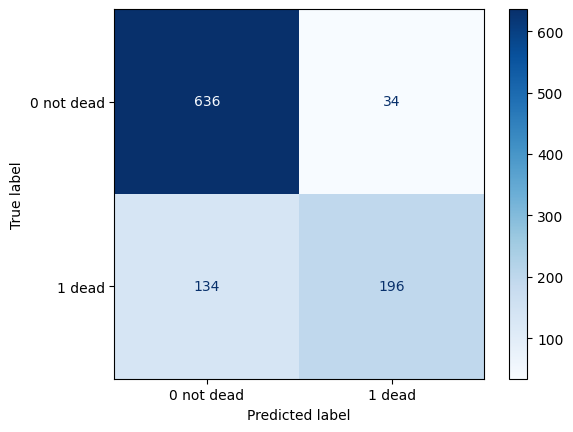

In [ ]:
# 5.3 Evaluate with testing data set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=6)
HHmodel = DecisionTreeClassifier(
    criterion = 'gini',
    max_depth = best_max_depth,
    max_leaf_nodes = max_leaf_nodes,
    min_samples_leaf = 1,
    random_state = 6
)
# 訓練模型
HHmodel.fit(
    x_train,
    y_train
)

final_model_testing_prediction = HHmodel.predict(
    x_test
)
# ACC
final_model_testing_acc = accuracy_score(
    y_test,
    final_model_testing_prediction
)

final_model_testing_f1s = f1_score(
    y_test,
    final_model_testing_prediction,
    pos_label=1
)

final_model_testing_pre = precision_score(
    y_test,
    final_model_testing_prediction,
    pos_label=1
)

final_model_testing_sen = recall_score(
    y_test,
    final_model_testing_prediction,
    pos_label=1
)

final_model_testing_spe = recall_score(
    y_test,
    final_model_testing_prediction,
    pos_label=0
)

final_model_testing_cm = confusion_matrix(
    y_test,
    final_model_testing_prediction
)
#print result
print('Testing ACC:',round(final_model_testing_acc*100,2))
print('Testing f1s:',round(final_model_testing_f1s*100,2))
print('Testing pre:',round(final_model_testing_pre*100,2))
print('Testing sen:',round(final_model_testing_sen*100,2))
print('Testing spe:',round(final_model_testing_spe*100,2))
# 混淆矩陣
ConfusionMatrixDisplay(
    final_model_testing_cm,
    display_labels=["0 not dead","1 dead"]
).plot(cmap=plt.cm.Blues)

## 印出決策樹

 ccpmodel_max_depth: 16
 ccpmodel_max_leaf_nodes: 151


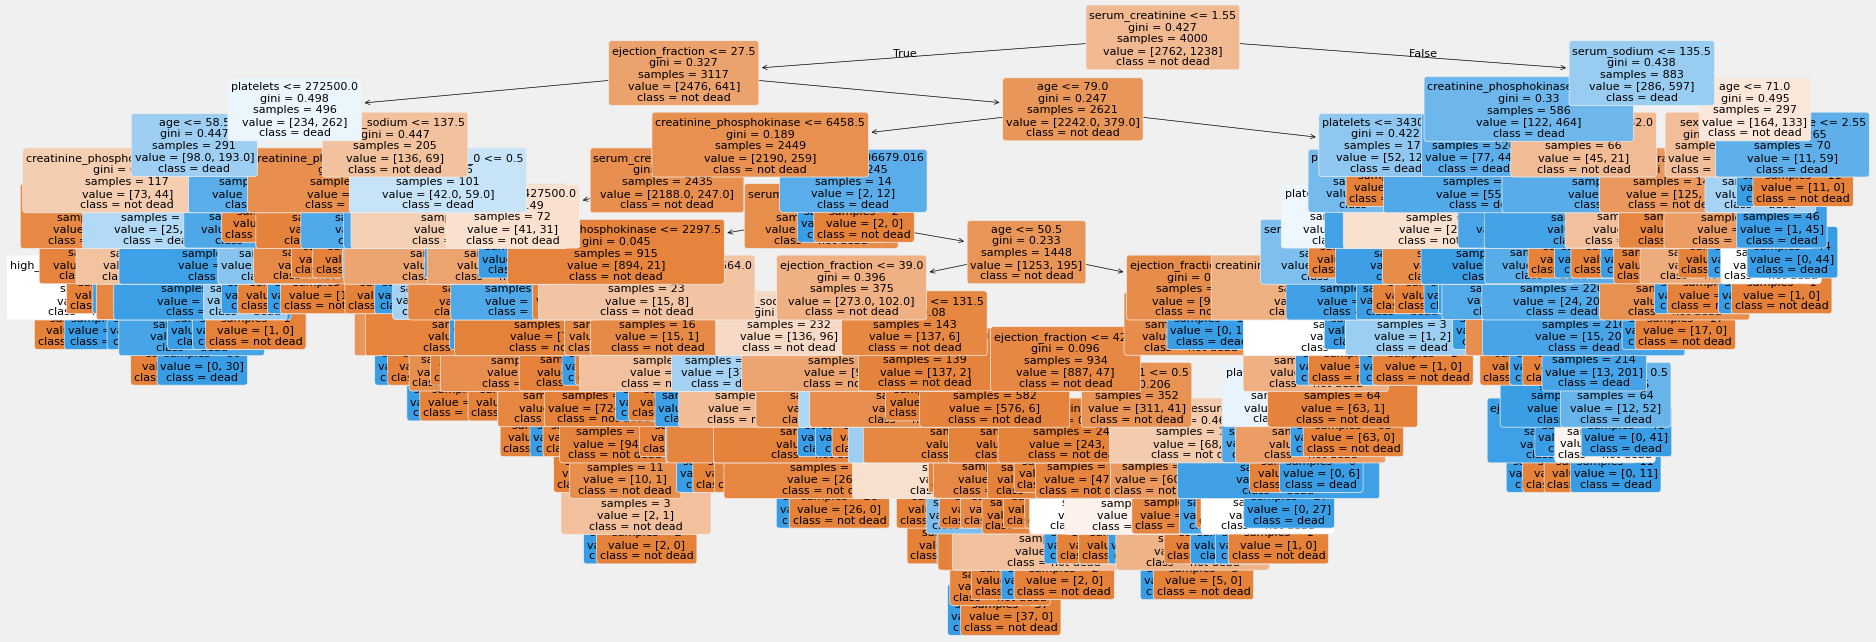

In [ ]:
# Plot tree
plt.figure(figsize=(18,7.5))
tree.plot_tree(DTmodel,filled=True,rounded=True,class_names=["not dead","dead"],feature_names=x.columns,fontsize=8);
print(f" ccpmodel_max_depth: {DTmodel.get_depth()}")
print(f" ccpmodel_max_leaf_nodes: {DTmodel.get_n_leaves()}")

# DecisionTree後剪枝

[0.00000000e+00 2.08333333e-06 1.24827586e-04 1.65983607e-04
 1.70407290e-04 2.34375000e-04 2.41379310e-04 2.42187500e-04
 2.43902439e-04 2.44565217e-04 2.44897959e-04 2.47093023e-04
 2.47191011e-04 2.47340426e-04 2.48333333e-04 2.49006140e-04
 3.28537170e-04 3.33333333e-04 3.33333333e-04 3.69469607e-04
 3.75000000e-04 3.76283847e-04 4.28571429e-04 4.50000000e-04
 4.50000000e-04 4.50000000e-04 4.64576074e-04 4.70588235e-04
 4.73684211e-04 4.80769231e-04 4.80769231e-04 4.82825448e-04
 4.86111111e-04 4.88437002e-04 4.90384615e-04 4.91525424e-04
 4.92187500e-04 4.95594714e-04 4.96130355e-04 7.10397653e-04
 8.57142857e-04 8.72080089e-04 9.13043478e-04 9.21968788e-04
 9.33100865e-04 9.35483871e-04 9.54545455e-04 1.00657895e-03
 1.46666667e-03 1.51260504e-03 1.62062500e-03 1.84317443e-03
 1.88851436e-03 1.95017077e-03 2.19965126e-03 2.34882353e-03
 2.44194927e-03 2.45454545e-03 2.45454545e-03 2.51704344e-03
 2.88102878e-03 2.93415751e-03 3.13857143e-03 3.45717636e-03
 3.47300127e-03 3.479780

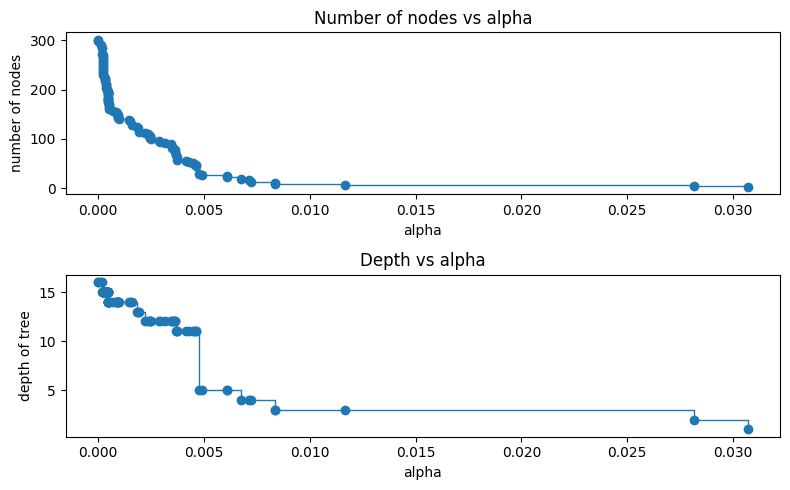

In [ ]:
# 參考來源 https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html
clf = DecisionTreeClassifier(criterion='gini',max_depth=None,max_leaf_nodes=None,min_samples_leaf=1,random_state=6)

# 依最小成本修剪方式計算修剪過程
path = clf.cost_complexity_pruning_path(x_train, y_train)

# 回傳修剪過程的有效 alpha 值
ccp_alphas = path.ccp_alphas
print(ccp_alphas)

# 放置決策樹的列表
clfs = []

# 依照每個 alpha 值建立決策樹
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(ccp_alpha=ccp_alpha)
    clf.fit(x_train, y_train)
    clfs.append(clf)

# 過濾掉最後只剩一個節點的決策樹，因為這個決策樹不會有任何分類效果
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

# 決策樹的節點數量
node_counts = [clf.tree_.node_count for clf in clfs]

# 決策樹的深度
depth = [clf.tree_.max_depth for clf in clfs]

# 繪製節點數量與深度的關係
fig, ax = plt.subplots(2, 1, figsize=(8, 5))

# 繪製節點數量與 alpha 的關係
ax[0].plot(ccp_alphas, node_counts, marker='o', lw=1, drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")

# 繪製深度與 alpha 的關係
ax[1].plot(ccp_alphas, depth, marker='o', lw=1, drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")

# 調整子圖間距
fig.tight_layout()

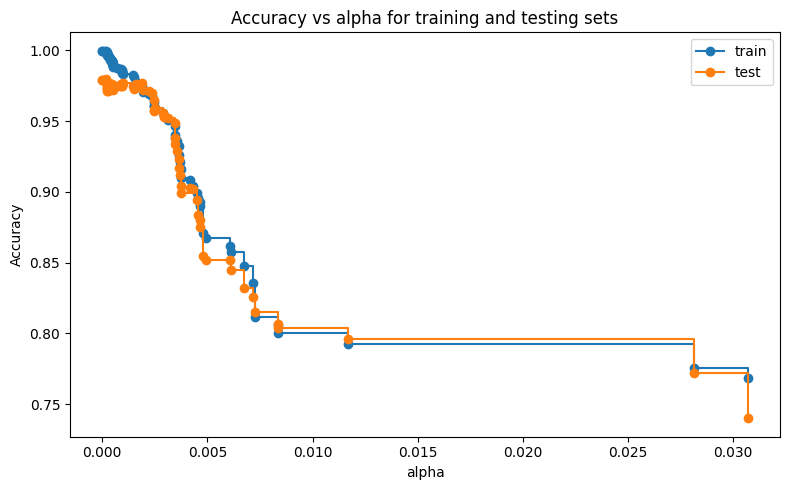

In [ ]:
from matplotlib.ticker import MultipleLocator
# 訓練集的準確率
train_scores = [clf.score(x_train, y_train) for clf in clfs]

# 測試集的準確率
test_scores = [clf.score(x_test, y_test) for clf in clfs]

# 繪製 alpha 與準確率的關係
fig, ax = plt.subplots(figsize=(8, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")

ax.legend()
fig.tight_layout()

In [ ]:
ccpmodel=DecisionTreeClassifier(random_state=6, ccp_alpha=0.008).fit(x_train, y_train)
ccpmodel.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.008, random_state=6)

### 混淆矩陣

Testing ACC: 81.5
Testing f1s: 70.4
Testing pre: 74.58
Testing sen: 66.67
Testing spe: 88.81


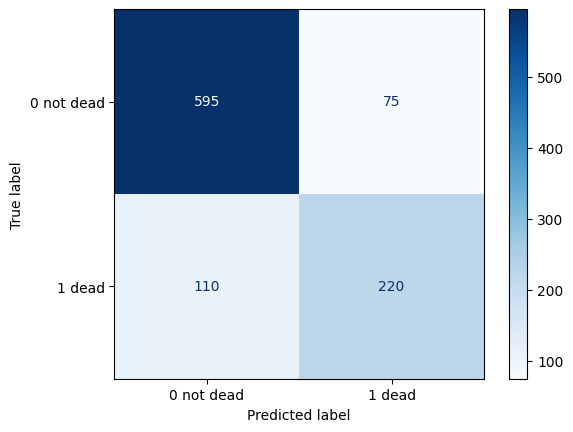

In [ ]:
# 5.3 Evaluate with testing data set
ccp_model_testing_prediction = ccpmodel.predict(
    x_test
)
# ACC
ccp_model_testing_acc = accuracy_score(
    y_test,
    ccp_model_testing_prediction
)

ccp_model_testing_f1s = f1_score(
    y_test,
    ccp_model_testing_prediction,
    pos_label=1
)

ccp_model_testing_pre = precision_score(
    y_test,
    ccp_model_testing_prediction,
    pos_label=1
)

ccp_model_testing_sen = recall_score(
    y_test,
    ccp_model_testing_prediction,
    pos_label=1
)

ccp_model_testing_spe = recall_score(
    y_test,
    ccp_model_testing_prediction,
    pos_label=0
)

ccp_model_testing_cm = confusion_matrix(
    y_test,
    ccp_model_testing_prediction
)
#print result
print('Testing ACC:',round(ccp_model_testing_acc*100,2))
print('Testing f1s:',round(ccp_model_testing_f1s*100,2))
print('Testing pre:',round(ccp_model_testing_pre*100,2))
print('Testing sen:',round(ccp_model_testing_sen*100,2))
print('Testing spe:',round(ccp_model_testing_spe*100,2))
# 混淆矩陣
ConfusionMatrixDisplay(
    ccp_model_testing_cm,
    display_labels=["0 not dead","1 dead"]
).plot(cmap=plt.cm.Blues)

### 印出決策樹

 ccpmodel_max_depth: 4
 ccpmodel_max_leaf_nodes: 7


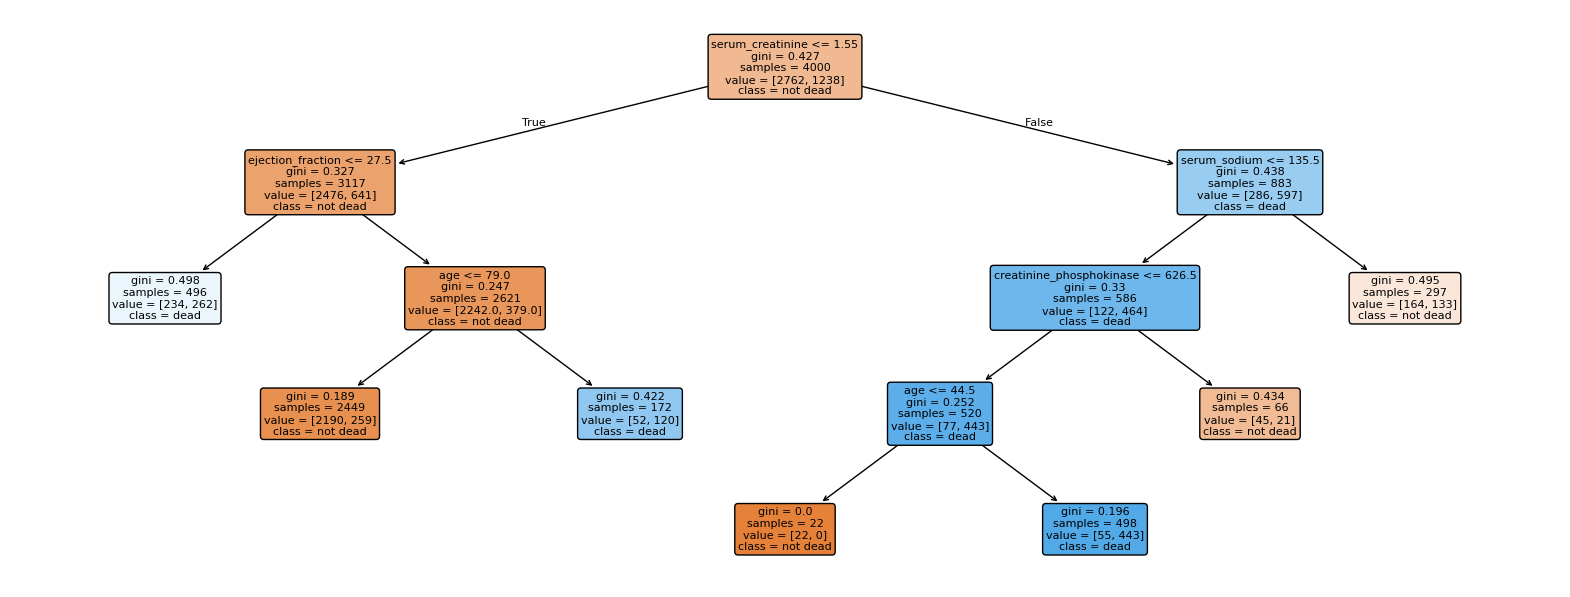

In [ ]:
# Plot tree
plt.figure(figsize=(20,7.5))
tree.plot_tree(ccpmodel,filled=True,rounded=True,class_names=["not dead","dead"],feature_names=x.columns,fontsize=8);
print(f" ccpmodel_max_depth: {ccpmodel.get_depth()}")
print(f" ccpmodel_max_leaf_nodes: {ccpmodel.get_n_leaves()}")

### 學習曲線

In [ ]:
import numpy as np
from sklearn.model_selection import learning_curve

# 設定訓練資料的比例
size = np.linspace(0.1, 1.0, 10)
'''
# 將訓練資料分成 10 等分，從 10% 到 100%
[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
'''

# 計算學習曲線
train_sizes, train_scores, valid_scores = learning_curve(
    estimator=ccpmodel, # 使用管線
    X=x_train, # 訓練資料
    y=y_train, # 訓練標籤
    train_sizes=size, # 訓練資料的比例
    cv=3 # 交叉驗證的次數
)

# 顯示 CV 過程中，的前 5 筆訓練分數
# train_scores[:5, :]
# 計算訓練資料的平均數和標準差
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)

# 顯示驗證資料的平均數和標準差
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)
# 顯示訓練資料的平均數
print('訓練資料平均分數:',train_scores_mean)
# 顯示驗證資料的平均數
print('驗證資料平均分數:',valid_scores_mean)

訓練資料平均分數: [0.94736842 0.88805503 0.85398415 0.85709819 0.84146037 0.83260371
 0.83869239 0.8322389  0.82909546 0.84533633]
驗證資料平均分數: [0.78425247 0.81774398 0.81999848 0.82899773 0.82024273 0.81474679
 0.82274804 0.82574879 0.81599635 0.83824554]


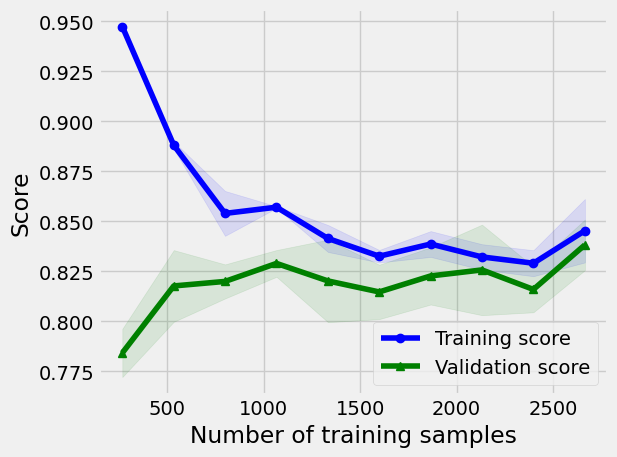

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# 繪製學習曲線
plt.plot(train_sizes,
         train_scores_mean,
         color='blue',
         marker='o',
         label='Training score')

# 填充區域 (訓練分數)
plt.fill_between(train_sizes,
                 train_scores_mean + train_scores_std,
                 train_scores_mean - train_scores_std,
                 color='blue', alpha=.1)

# 繪製驗證曲線
plt.plot(train_sizes, valid_scores_mean,
         color='green', marker='^',
         label='Validation score')


# 填充區域 (驗證分數)
plt.fill_between(train_sizes,
                 valid_scores_mean + valid_scores_std,
                 valid_scores_mean - valid_scores_std,
                 color='green', alpha=.1)

# 加入標題與軸標籤
plt.xlabel('Number of training samples')
plt.ylabel('Score')
plt.legend(loc='lower right')
plt.tight_layout()

# 隨機森林

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RandomForestClassifier(random_state=6)

RandomForestClassifier(random_state=6)

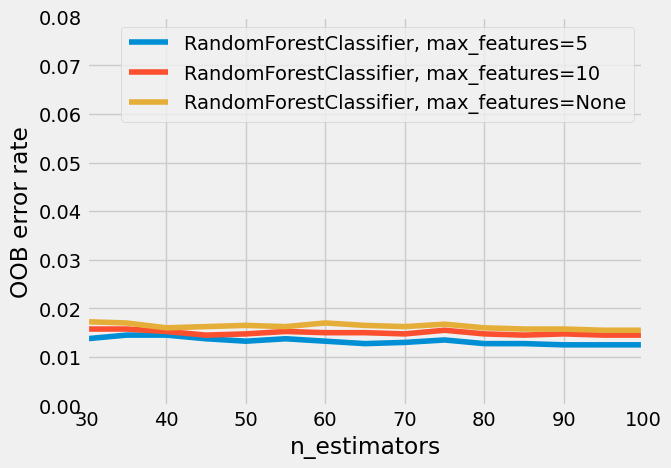

In [ ]:
from collections import OrderedDict

RANDOM_STATE = 6
# NOTE: Setting the `warm_start` construction parameter to `True` disables
# support for parallelized ensembles but is necessary for tracking the OOB
# error trajectory during training.


ensemble_clfs = [

    (
        "RandomForestClassifier, max_features=5",
        RandomForestClassifier(
            warm_start=True,
            oob_score=True,
            max_features=5,
            random_state=RANDOM_STATE,
        ),
    ),
    (
        "RandomForestClassifier, max_features=10",
        RandomForestClassifier(
            warm_start=True,
            max_features=15,
            oob_score=True,
            random_state=RANDOM_STATE,
        ),
    ),
    (
        "RandomForestClassifier, max_features=None",
        RandomForestClassifier(
            warm_start=True,
            max_features=None,
            oob_score=True,
            random_state=RANDOM_STATE,
        ),
    ),
]


# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

# Range of `n_estimators` values to explore.
min_estimators = 30
max_estimators = 100

for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1, 5):
        clf.set_params(n_estimators=i)
        clf.fit(x_train, y_train)

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

# Generate the "OOB error rate" vs. "n_estimators" plot.
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.ylim(0, 0.08)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# 建立隨機森林分類器
clf = RandomForestClassifier(n_estimators=40,max_features=5,random_state=6,n_jobs=-1)
# 訓練模型
clf.fit(x_train, y_train)

RandomForestClassifier(max_features=5, n_estimators=40, n_jobs=-1,
                       random_state=6)

Testing ACC: 98.9
Testing f1s: 98.32
Testing pre: 99.38
Testing sen: 97.27
Testing spe: 99.7


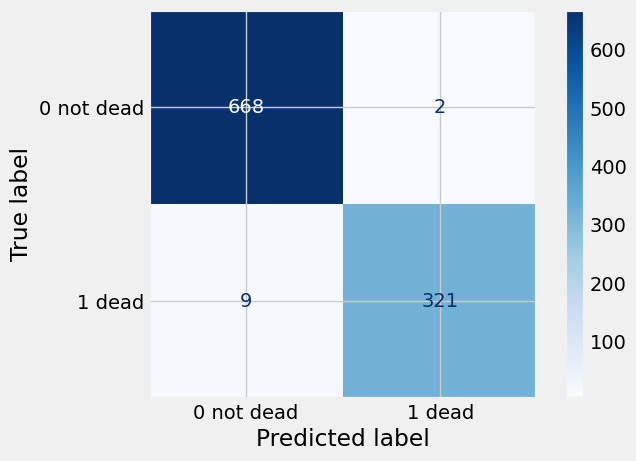

In [ ]:
# 5.3 Evaluate with testing data set
clf_model_testing_prediction = clf.predict(
    x_test
)
# ACC
clf_model_testing_acc = accuracy_score(
    y_test,
    clf_model_testing_prediction
)

clf_model_testing_f1s = f1_score(
    y_test,
    clf_model_testing_prediction,
    pos_label=1
)

clf_model_testing_pre = precision_score(
    y_test,
    clf_model_testing_prediction,
    pos_label=1
)

clf_model_testing_sen = recall_score(
    y_test,
    clf_model_testing_prediction,
    pos_label=1
)

clf_model_testing_spe = recall_score(
    y_test,
    clf_model_testing_prediction,
    pos_label=0
)

clf_model_testing_cm = confusion_matrix(
    y_test,
    clf_model_testing_prediction
)
#print result
print('Testing ACC:',round(clf_model_testing_acc*100,2))
print('Testing f1s:',round(clf_model_testing_f1s*100,2))
print('Testing pre:',round(clf_model_testing_pre*100,2))
print('Testing sen:',round(clf_model_testing_sen*100,2))
print('Testing spe:',round(clf_model_testing_spe*100,2))
# 混淆矩陣
ConfusionMatrixDisplay(
    clf_model_testing_cm,
    display_labels=["0 not dead","1 dead"]
).plot(cmap=plt.cm.Blues)

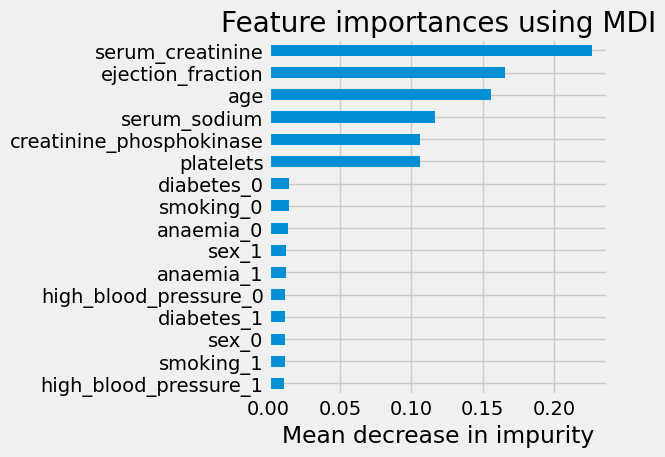

In [ ]:
# 特徵重要性
feature_names = x.columns
forest = RandomForestClassifier(n_estimators=40,max_features=5,random_state=0)
forest.fit(x_train, y_train)
importances = clf.feature_importances_
forest_importances = pd.Series(importances,index=feature_names).sort_values(ascending=True)
fig, ax = plt.subplots()
forest_importances.plot.barh(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_xlabel("Mean decrease in impurity")
# save_fig("rftune_varplt")
fig.tight_layout()

In [ ]:
import numpy as np
from sklearn.model_selection import learning_curve

# 設定訓練資料的比例
size = np.linspace(0.1, 1.0, 10)
'''
# 將訓練資料分成 10 等分，從 10% 到 100%
[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
'''

# 計算學習曲線
train_sizes, train_scores, valid_scores = learning_curve(
    estimator=clf, # 使用管線
    X=x_train, # 訓練資料
    y=y_train, # 訓練標籤
    train_sizes=size, # 訓練資料的比例
    cv=3 # 交叉驗證的次數
)

# 顯示 CV 過程中，的前 5 筆訓練分數
# train_scores[:5, :]
# 計算訓練資料的平均數和標準差
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)

# 顯示驗證資料的平均數和標準差
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

# 顯示驗證資料的平均數
valid_scores_mean

array([0.8905028 , 0.92475068, 0.95124962, 0.96475   , 0.97749962,
       0.9825005 , 0.98500019, 0.98575112, 0.98650056, 0.98675062])

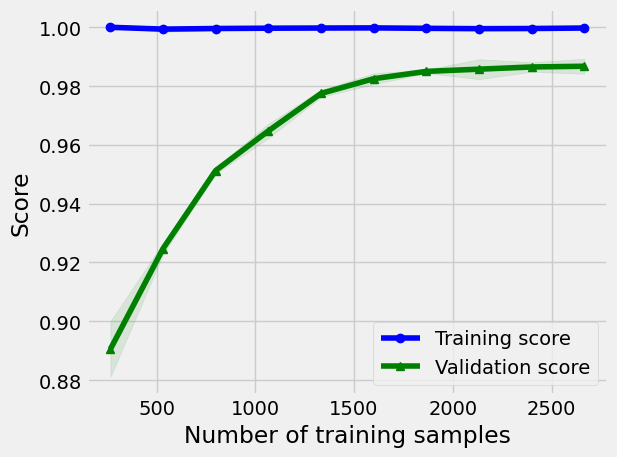

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# 繪製學習曲線
plt.plot(train_sizes,
         train_scores_mean,
         color='blue',
         marker='o',
         label='Training score')

# 填充區域 (訓練分數)
plt.fill_between(train_sizes,
                 train_scores_mean + train_scores_std,
                 train_scores_mean - train_scores_std,
                 color='blue', alpha=.1)

# 繪製驗證曲線
plt.plot(train_sizes, valid_scores_mean,
         color='green', marker='^',
         label='Validation score')


# 填充區域 (驗證分數)
plt.fill_between(train_sizes,
                 valid_scores_mean + valid_scores_std,
                 valid_scores_mean - valid_scores_std,
                 color='green', alpha=.1)

# 加入標題與軸標籤
plt.xlabel('Number of training samples')
plt.ylabel('Score')
plt.legend(loc='lower right')
plt.tight_layout()

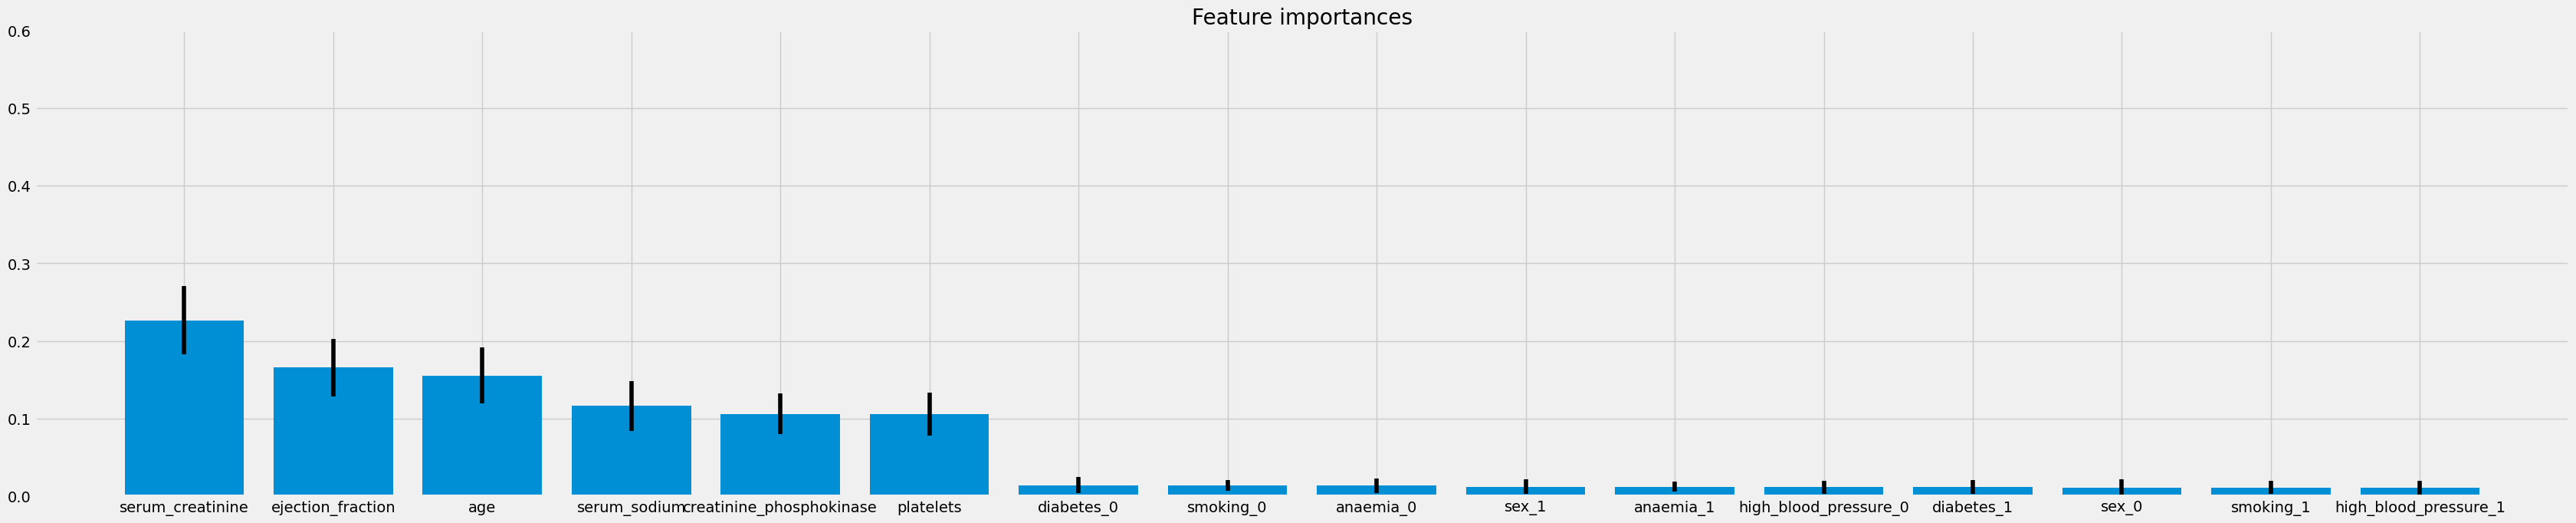

In [ ]:
# 特徵重要性
importances = clf.feature_importances_

'''
# 查看第一棵樹的細節
first_tree = clf.estimators_[0]
print(first_tree)
'''

# 標籤名稱 (t 指的是隨機森林中的每一棵樹)
std = np.std([t.feature_importances_ for t in clf.estimators_], axis=0)

# 取出特徵重要性與排序後的索引值
idx = np.argsort(importances)[::-1]

# 繪製特徵重要性的柱狀圖
plt.figure(figsize=(38,7.5))
plt.title("Feature importances")
plt.bar(
    range(x.shape[1]),
    importances[idx],
    yerr=std[idx],
    align="center"
)
plt.xticks(range(x.shape[1]), labels=x.columns[idx])
plt.xlim([-1, x.shape[1]])
plt.ylim([0, 0.6])
plt.show()

In [ ]:
from sklearn.feature_selection import SelectFromModel

# 建立特徵選取器，門檻值預設為重要性的平均值
selector = SelectFromModel(clf)

# 訓練特徵選取器
selector.fit(x_train, y_train)

print('門檻值 =', selector.threshold_)
print('特徵列表：', x.columns)
print('特徵遮罩：', selector.get_support())

# 選出訓練集的新特徵
x_train_new = selector.transform(x_train)

# 用訓練集的新特徵重新訓練隨機森林
clf.fit(x_train_new, y_train)

# 選出測試集的新特徵
x_test_new = selector.transform(x_test)

# 預測測試集
y_pred = clf.predict(x_test_new)

# 產生分類報告
print(classification_report(y_test, y_pred))

門檻值 = 0.0625
特徵列表： Index(['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets',
       'serum_creatinine', 'serum_sodium', 'anaemia_0', 'anaemia_1',
       'diabetes_0', 'diabetes_1', 'high_blood_pressure_0',
       'high_blood_pressure_1', 'sex_0', 'sex_1', 'smoking_0', 'smoking_1'],
      dtype='object')
特徵遮罩： [ True  True  True  True  True  True False False False False False False
 False False False False]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       670
           1       0.99      0.96      0.98       330

    accuracy                           0.99      1000
   macro avg       0.99      0.98      0.98      1000
weighted avg       0.99      0.99      0.99      1000



In [ ]:
clf = RandomForestClassifier(random_state=6,n_jobs=-1)
clf.fit(x_train_new, y_train)

RandomForestClassifier(n_jobs=-1, random_state=6)

Testing ACC: 98.8
Testing f1s: 98.15
Testing pre: 99.69
Testing sen: 96.67
Testing spe: 99.85


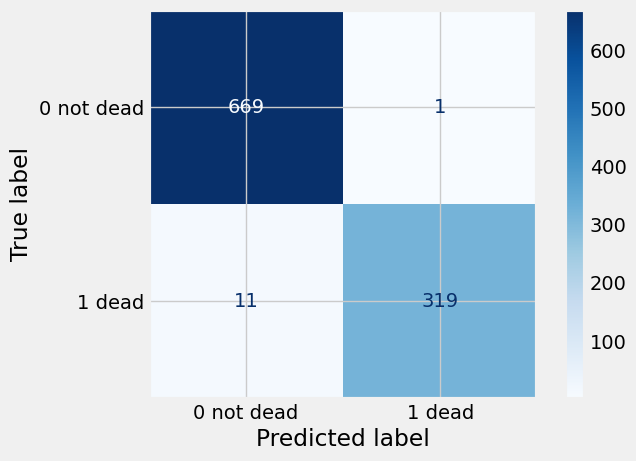

In [ ]:
# 5.3 Evaluate with testing data set
RF_model_testing_prediction = clf.predict(
    x_test_new
)
# ACC
RF_model_testing_acc = accuracy_score(
    y_test,
    RF_model_testing_prediction
)

RF_model_testing_f1s = f1_score(
    y_test,
    RF_model_testing_prediction,
    pos_label=1
)

RF_model_testing_pre = precision_score(
    y_test,
    RF_model_testing_prediction,
    pos_label=1
)

RF_model_testing_sen = recall_score(
    y_test,
    RF_model_testing_prediction,
    pos_label=1
)

RF_model_testing_spe = recall_score(
    y_test,
    RF_model_testing_prediction,
    pos_label=0
)

RF_model_testing_cm = confusion_matrix(
    y_test,
    RF_model_testing_prediction
)
#print result
print('Testing ACC:',round(RF_model_testing_acc*100,2))
print('Testing f1s:',round(RF_model_testing_f1s*100,2))
print('Testing pre:',round(RF_model_testing_pre*100,2))
print('Testing sen:',round(RF_model_testing_sen*100,2))
print('Testing spe:',round(RF_model_testing_spe*100,2))
# 混淆矩陣
ConfusionMatrixDisplay(
    RF_model_testing_cm,
    display_labels=["0 not dead","1 dead"]
).plot(cmap=plt.cm.Blues)

In [ ]:
import numpy as np
from sklearn.model_selection import learning_curve

# 設定訓練資料的比例
size = np.linspace(0.1, 1.0, 10)
'''
# 將訓練資料分成 10 等分，從 10% 到 100%
[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
'''

# 計算學習曲線
train_sizes, train_scores, valid_scores = learning_curve(
    estimator=clf, # 使用管線
    X=x_train_new, # 訓練資料
    y=y_train, # 訓練標籤
    train_sizes=size, # 訓練資料的比例
    cv=3 # 交叉驗證的次數
)

# 顯示 CV 過程中，的前 5 筆訓練分數
# train_scores[:5, :]
# 計算訓練資料的平均數和標準差
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)

# 顯示驗證資料的平均數和標準差
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

# 顯示驗證資料的平均數
valid_scores_mean

array([0.86774955, 0.91949787, 0.94774931, 0.9657495 , 0.97524906,
       0.98100087, 0.98150025, 0.98325125, 0.98300081, 0.98375081])

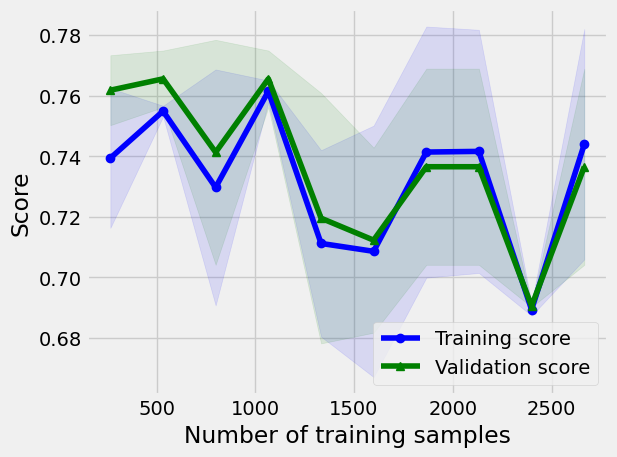

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# 繪製學習曲線
plt.plot(train_sizes,
         train_scores_mean,
         color='blue',
         marker='o',
         label='Training score')

# 填充區域 (訓練分數)
plt.fill_between(train_sizes,
                 train_scores_mean + train_scores_std,
                 train_scores_mean - train_scores_std,
                 color='blue', alpha=.1)

# 繪製驗證曲線
plt.plot(train_sizes, valid_scores_mean,
         color='green', marker='^',
         label='Validation score')


# 填充區域 (驗證分數)
plt.fill_between(train_sizes,
                 valid_scores_mean + valid_scores_std,
                 valid_scores_mean - valid_scores_std,
                 color='green', alpha=.1)

# 加入標題與軸標籤
plt.xlabel('Number of training samples')
plt.ylabel('Score')
plt.legend(loc='lower right')
plt.tight_layout()

# SVM

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# 建立管線
pipe = Pipeline([
    ('preprocessor', pre),
    ('clf', SVC())
])

# 設定網格搜尋的超參數範圍
C = [1, 2, 4]
degree = [3, 5, 8]
param_grid = [
    {'clf': [SVC()],
     'clf__C': C,
     'clf__degree': degree,
     'clf__kernel': ['poly']}
     ]

# 評估指標為 accuracy
grid_s = GridSearchCV(
    estimator=pipe,
    cv=3,
    param_grid=param_grid,
    scoring='accuracy',
    )
# 訓練模型
grid_s.fit(X_train, y_train)

print('Best score (training):', grid_s.best_score_)
print('Best parameters (training):', grid_s.best_params_)

# 顯示測試資料的準確度
grid_s.score(X_test, y_test)

Best score (training): 0.9574994948137334
Best parameters (training): {'clf': SVC(), 'clf__C': 2, 'clf__degree': 8, 'clf__kernel': 'poly'}


0.957

In [ ]:
pipe

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('sc',
                                                                   MinMaxScaler())]),
                                                  ['age',
                                                   'creatinine_phosphokinase',
                                                   'ejection_fraction',
                                                   'platelets',
                                                   'serum_creatinine',
                                                   'serum_sodium']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder())]),
                                                  ['anaemia', 'diabetes',
                                                   'high_blood_pressure', 'sex',
                                                   'smoking'])])),
                ('clf', SVC())])

## kernel='poly'版

In [ ]:
#SVM
# 5.1 Split the data (split into 80% training data & 20% testing data) (lock seed)
results = []
x_train,x_test,y_train,y_test=train_test_split(scaled_data,y,test_size=0.2,random_state=6)#這邊把原本x改成scaled_data
# 5.2 Manually peforming hyper parameter tuning
for random_state in [6,60,600]:
  x_train_tuning,x_valid,y_train_tuning,y_valid=train_test_split(x_train,y_train,test_size=0.2,random_state=random_state)
  for c in [1,2,4]:
    for degree in [3,5,8]:
      model=SVC(C=c,kernel='poly',degree=degree) # C =[1,2,4,8,16,32,64] Degree > 1-10 kernel='poly'or'rbf'
      model.fit(x_train_tuning,y_train_tuning)
      prediction=model.predict(x_valid)
      Valid_acc=accuracy_score(y_valid,prediction)
      # 收集每次的結果
      results.append({
          'random_state': random_state,
          'C': c,
          'degree': degree,
          'Valid_ACC': round(Valid_acc * 100, 2)
      })
# 將結果轉換為 DataFrame
results_df = pd.DataFrame(results)
# 查看結果
results_df

### 取三次平均_SVM

In [ ]:
#取平均
import pandas as pd
# 新增 'group' 列，
results_df['group'] = [i % 9 + 1 for i in range(27)]
# 按 'group' 分组，對各列進行相加後取平均
aggregated_df = results_df.groupby('group').mean().reset_index()
# 四捨五入到小數點後兩位
aggregated_df = aggregated_df.round(4)
# 刪除 random_state 欄位
aggregated_df = aggregated_df.drop(columns=['random_state'])
aggregated_df

### 找到SVM最佳超參數

In [ ]:
# 找到最佳Valid_ACC那一筆
best_valid_acc_row = aggregated_df.loc[aggregated_df['Valid_ACC'].idxmax()]
# 取出最佳Valid_ACC的超參數值
C = int(best_valid_acc_row['C'])
degree = int(best_valid_acc_row['degree'])
# 查看结果
print(C)
print(degree)

### 將最佳超參數帶入模型

In [ ]:
#SVM
#把參數丟進來
# 6.1 Fit the model with LinearSVC
SVMmodel=SVC(C=C,kernel='poly',degree=degree)
SVMmodel.fit(x_train,y_train)

### 印出混淆矩陣

In [ ]:
# 7.3 Evaluate with testing data set
SVM_model_testing_prediction=SVMmodel.predict(x_test)
SVM_model_testing_acc=accuracy_score(y_test,SVM_model_testing_prediction)
SVM_model_testing_f1s=f1_score(y_test,SVM_model_testing_prediction,pos_label=1)
SVM_model_testing_pre=precision_score(y_test,SVM_model_testing_prediction,pos_label=1)
SVM_model_testing_sen=sensitivity_score(y_test,SVM_model_testing_prediction,pos_label=1)
SVM_model_testing_spe=specificity_score(y_test,SVM_model_testing_prediction,pos_label=1)
SVM_model_testing_cm=confusion_matrix(y_test,SVM_model_testing_prediction)

#print result
print('Testing ACC:',round(SVM_model_testing_acc*100,2))
print('Testing f1s:',round(SVM_model_testing_f1s*100,2))
print('Testing pre:',round(SVM_model_testing_pre*100,2))
print('Testing sen:',round(SVM_model_testing_sen*100,2))
print('Testing spe:',round(SVM_model_testing_spe*100,2))
ConfusionMatrixDisplay(SVM_model_testing_cm,display_labels=["0 not dead","1 dead"]).plot(cmap=plt.cm.Blues)

## kernel='rbf'版

In [ ]:
#SVM
# 5.1 Split the data (split into 80% training data & 20% testing data) (lock seed)
results = []
x_train,x_test,y_train,y_test=train_test_split(scaled_data,y,test_size=0.2,random_state=6)#這邊把原本x改成scaled_data
# 5.2 Manually peforming hyper parameter tuning
for random_state in [6,60,600]:
  x_train_tuning,x_valid,y_train_tuning,y_valid=train_test_split(x_train,y_train,test_size=0.2,random_state=random_state)
  for c in [1,2,4]:
    for degree in [3,5,8]:
      model=SVC(C=c,kernel='rbf',degree=degree) # C =[1,2,4,8,16,32,64] Degree > 1-10 kernel='poly'or'rbf'
      model.fit(x_train_tuning,y_train_tuning)
      prediction=model.predict(x_valid)
      Valid_acc=accuracy_score(y_valid,prediction)
      # 收集每次的結果
      results.append({
          'random_state': random_state,
          'C': c,
          'degree': degree,
          'Valid_ACC': round(Valid_acc * 100, 2)
      })
# 將結果轉換為 DataFrame
results_df = pd.DataFrame(results)

# 查看結果
results_df

### 取三次平均_SVM

In [ ]:
#取平均
import pandas as pd
# 新增 'group' 列，
results_df['group'] = [i % 9 + 1 for i in range(27)]
# 按 'group' 分组，對各列進行相加後取平均
aggregated_df = results_df.groupby('group').mean().reset_index()
# 四捨五入到小數點後兩位
aggregated_df = aggregated_df.round(4)
# 刪除 random_state 欄位
aggregated_df = aggregated_df.drop(columns=['random_state'])
aggregated_df

,group,C,degree,Valid_ACC
0,1,1.0,3.0,86.5833
1,2,1.0,5.0,91.4567
2,3,1.0,8.0,95.9167
3,4,2.0,3.0,86.7067
4,5,2.0,5.0,92.6633
5,6,2.0,8.0,96.1700
6,7,4.0,3.0,87.1667
7,8,4.0,5.0,93.7900
8,9,4.0,8.0,96.4567


### 找到SVM最佳超參數

In [ ]:
# 找到最佳Valid_ACC那一筆
best_valid_acc_row = aggregated_df.loc[aggregated_df['Valid_ACC'].idxmax()]
# 取出最佳Valid_ACC的超參數值
C = int(best_valid_acc_row['C'])
degree = int(best_valid_acc_row['degree'])
# 查看结果
print(C)
print(degree)

4
8


### 將最佳超參數帶入模型

In [ ]:
#SVM
#把參數丟進來
# 6.1 Fit the model with LinearSVC
SVMmodel=SVC(C=C,kernel='rbf',degree=degree)
SVMmodel.fit(x_train,y_train)

### 印出混淆矩陣

Testing ACC: 95.9
Testing f1s: 93.78
Testing pre: 93.92
Testing sen: 93.64
Testing spe: 97.01


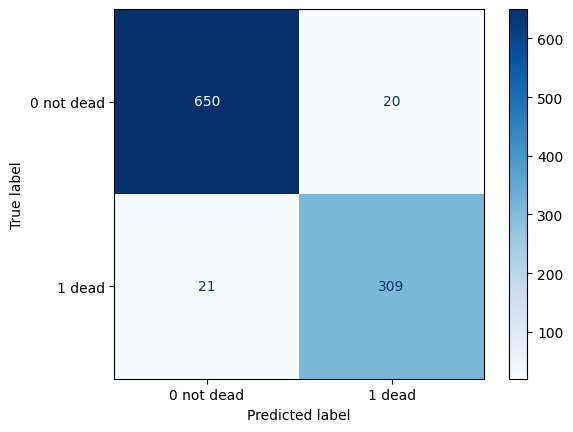

In [ ]:
# 7.3 Evaluate with testing data set
SVM_model_testing_prediction=SVMmodel.predict(x_test)
SVM_model_testing_acc=accuracy_score(y_test,SVM_model_testing_prediction)
SVM_model_testing_f1s=f1_score(y_test,SVM_model_testing_prediction,pos_label=1)
SVM_model_testing_pre=precision_score(y_test,SVM_model_testing_prediction,pos_label=1)
SVM_model_testing_sen=sensitivity_score(y_test,SVM_model_testing_prediction,pos_label=1)
SVM_model_testing_spe=specificity_score(y_test,SVM_model_testing_prediction,pos_label=1)
SVM_model_testing_cm=confusion_matrix(y_test,SVM_model_testing_prediction)

#print result
print('Testing ACC:',round(SVM_model_testing_acc*100,2))
print('Testing f1s:',round(SVM_model_testing_f1s*100,2))
print('Testing pre:',round(SVM_model_testing_pre*100,2))
print('Testing sen:',round(SVM_model_testing_sen*100,2))
print('Testing spe:',round(SVM_model_testing_spe*100,2))
ConfusionMatrixDisplay(SVM_model_testing_cm,display_labels=["0 not dead","1 dead"]).plot(cmap=plt.cm.Blues)

# KNN

## weights='uniform'版(原本的預設)

In [ ]:
#KNN
# 5.1 Split the data (split into 80% training data & 20% testing data) (lock seed)
results = []
x_train,x_test,y_train,y_test=train_test_split(scaled_data,y,test_size=0.2,random_state=6)#這邊把原本x改成scaled_data
for random_state in [6,60,600]:
  x_train_tuning,x_valid,y_train_tuning,y_valid=train_test_split(x_train,y_train,test_size=0.2,random_state=random_state)
  # 5.2 Manually peforming hyper parameter tuning
  for n_neighbors in [3,5,7]:
    model=KNeighborsClassifier(n_neighbors=n_neighbors) #n_neighbors >= 1
    model.fit(x_train_tuning,y_train_tuning)
    prediction=model.predict(x_valid)
    Valid_acc=accuracy_score(y_valid,prediction)
    # 收集每次的結果
    results.append({
        'random_state': random_state,
        'n_neighbors': n_neighbors,
        'Valid_ACC': round(Valid_acc * 100, 2)
    })
# 將結果轉換為 DataFrame
results_df = pd.DataFrame(results)

# 查看結果
results_df

### 取三次平均_KNN

In [ ]:
#取三次平均
import pandas as pd
# 新增 'group' 列，
results_df['group'] = [i % 3 + 1 for i in range(9)]
# 按 'group' 分组，對各列進行相加後取平均
aggregated_df = results_df.groupby('group').mean().reset_index()
# 四捨五入到小數點後兩位
aggregated_df = aggregated_df.round(4)
# 刪除 random_state 欄位
aggregated_df = aggregated_df.drop(columns=['random_state'])
aggregated_df

### 找到KNN最佳超參數

In [ ]:
# 找到最佳Valid_ACC那一筆
best_valid_acc_row = aggregated_df.loc[aggregated_df['Valid_ACC'].idxmax()]
# 取出最佳Valid_ACC的超參數值
n_neighbors = int(best_valid_acc_row['n_neighbors'])
# 查看结果
print(n_neighbors)

### 將最佳超參數帶入模型

In [ ]:
#KNN
#把參數丟進來
# 6.1 Fit the model with LinearSVC
KNNmodel=KNeighborsClassifier(n_neighbors=n_neighbors,weights='uniform')
KNNmodel.fit(x_train,y_train)

### 印出混淆矩陣

In [ ]:
# 7.3 Evaluate with testing data set
KNN_model_testing_prediction=KNNmodel.predict(x_test)
KNN_model_testing_acc=accuracy_score(y_test,KNN_model_testing_prediction)
KNN_model_testing_f1s=f1_score(y_test,KNN_model_testing_prediction,pos_label=1)
KNN_model_testing_pre=precision_score(y_test,KNN_model_testing_prediction,pos_label=1)
KNN_model_testing_sen=sensitivity_score(y_test,KNN_model_testing_prediction,pos_label=1)
KNN_model_testing_spe=specificity_score(y_test,KNN_model_testing_prediction,pos_label=1)
KNN_model_testing_cm=confusion_matrix(y_test,KNN_model_testing_prediction)

#print result
print('Testing ACC:',round(KNN_model_testing_acc*100,2))
print('Testing f1s:',round(KNN_model_testing_f1s*100,2))
print('Testing pre:',round(KNN_model_testing_pre*100,2))
print('Testing sen:',round(KNN_model_testing_sen*100,2))
print('Testing spe:',round(KNN_model_testing_spe*100,2))
ConfusionMatrixDisplay(KNN_model_testing_cm,display_labels=["0 not dead","1 dead"]).plot(cmap=plt.cm.Blues)

## weights='distance'版

In [ ]:
#KNN
# 5.1 Split the data (split into 80% training data & 20% testing data) (lock seed)
results = []
x_train,x_test,y_train,y_test=train_test_split(scaled_data,y,test_size=0.2,random_state=6)#這邊把原本x改成scaled_data
for random_state in [6,60,600]:
  x_train_tuning,x_valid,y_train_tuning,y_valid=train_test_split(x_train,y_train,test_size=0.2,random_state=random_state)
  # 5.2 Manually peforming hyper parameter tuning
  for n_neighbors in [3,5,7]:
    model=KNeighborsClassifier(n_neighbors=n_neighbors,weights='distance') #n_neighbors >= 1
    model.fit(x_train_tuning,y_train_tuning)
    prediction=model.predict(x_valid)
    Valid_acc=accuracy_score(y_valid,prediction)
    # 收集每次的結果
    results.append({
        'random_state': random_state,
        'n_neighbors': n_neighbors,
        'Valid_ACC': round(Valid_acc * 100, 2)
    })
# 將結果轉換為 DataFrame
results_df = pd.DataFrame(results)

# 查看結果
results_df

,random_state,n_neighbors,Valid_ACC
0,6,3,97.00
1,6,5,96.38
2,6,7,96.38
3,60,3,96.75
4,60,5,96.38
5,60,7,96.25
6,600,3,97.00
7,600,5,97.62
8,600,7,97.62


### 取三次平均_KNN

In [ ]:
#取三次平均
import pandas as pd
# 新增 'group' 列，
results_df['group'] = [i % 3 + 1 for i in range(9)]
# 按 'group' 分组，對各列進行相加後取平均
aggregated_df = results_df.groupby('group').mean().reset_index()
# 四捨五入到小數點後兩位
aggregated_df = aggregated_df.round(4)
# 刪除 random_state 欄位
aggregated_df = aggregated_df.drop(columns=['random_state'])
aggregated_df

,group,n_neighbors,Valid_ACC
0,1,3.0,96.9167
1,2,5.0,96.7933
2,3,7.0,96.7500


### 找到KNN最佳超參數

In [ ]:
# 找到最佳Valid_ACC那一筆
best_valid_acc_row = aggregated_df.loc[aggregated_df['Valid_ACC'].idxmax()]
# 取出最佳Valid_ACC的超參數值
n_neighbors = int(best_valid_acc_row['n_neighbors'])
# 查看结果
print(n_neighbors)

3


### 將最佳超參數帶入模型

In [ ]:
#KNN
#把參數丟進來
# 6.1 Fit the model with LinearSVC
KNNmodel=KNeighborsClassifier(n_neighbors=n_neighbors,weights='distance')
KNNmodel.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

### 印出混淆矩陣

Testing ACC: 95.8
Testing f1s: 93.5
Testing pre: 95.57
Testing sen: 91.52
Testing spe: 97.91


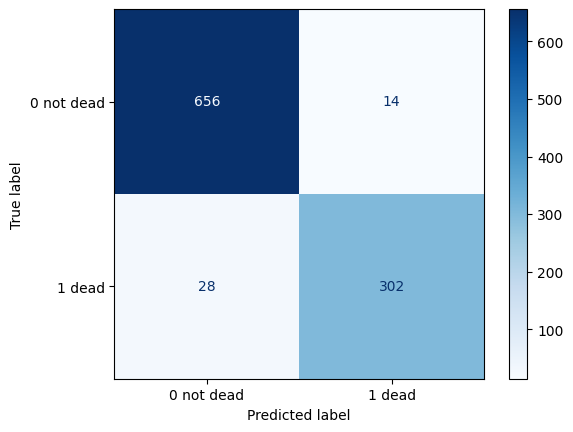

In [ ]:
# 7.3 Evaluate with testing data set
KNN_model_testing_prediction=KNNmodel.predict(x_test)
KNN_model_testing_acc=accuracy_score(y_test,KNN_model_testing_prediction)
KNN_model_testing_f1s=f1_score(y_test,KNN_model_testing_prediction,pos_label=1)
KNN_model_testing_pre=precision_score(y_test,KNN_model_testing_prediction,pos_label=1)
KNN_model_testing_sen=sensitivity_score(y_test,KNN_model_testing_prediction,pos_label=1)
KNN_model_testing_spe=specificity_score(y_test,KNN_model_testing_prediction,pos_label=1)
KNN_model_testing_cm=confusion_matrix(y_test,KNN_model_testing_prediction)

#print result
print('Testing ACC:',round(KNN_model_testing_acc*100,2))
print('Testing f1s:',round(KNN_model_testing_f1s*100,2))
print('Testing pre:',round(KNN_model_testing_pre*100,2))
print('Testing sen:',round(KNN_model_testing_sen*100,2))
print('Testing spe:',round(KNN_model_testing_spe*100,2))
ConfusionMatrixDisplay(KNN_model_testing_cm,display_labels=["0 not dead","1 dead"]).plot(cmap=plt.cm.Blues)

# 方法二:管道化，用GridSearch找超參數

# 資料前處理_管道化

In [ ]:
df['DEATH_EVENT']=df['DEATH_EVENT'].astype(int)

In [ ]:
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

from sklearn.compose import ColumnTransformer

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split, GridSearchCV
import pandas as pd
import numpy as np

# 確保隨機性可控
# np.random.seed(6)

# 處理數值型特徵
num_features = ['age', 'creatinine_phosphokinase', 'ejection_fraction','platelets','serum_creatinine', 'serum_sodium']
num_transform = Pipeline([
    # ('sc', StandardScaler())
    ('sc', MinMaxScaler())
])

# 處理類別型特徵
cat_features = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']
cat_transform = Pipeline([
    ('onehot', OneHotEncoder())
])

# 整合數值與類別特徵的處理步驟
pre = ColumnTransformer(
    transformers=[
        ('num', num_transform, num_features),
        ('cat', cat_transform, cat_features)
    ]
)

# 切分資料

In [ ]:
# 準備數據
X, y = df.loc[:, 'age':'smoking'], df['DEATH_EVENT']

# 切分訓練與測試數據
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6)

# 觀看數據集、訓練與測試集的類別比例
df_count = pd.concat(
    [y.value_counts(), y_train.value_counts(), y_test.value_counts()],
    axis=1
)

# 設定欄位名稱
df_count.columns = ['y_count', 'y_train_count', 'y_test_count']

# 顯示數據集、訓練與測試集的類別比例
df_count.head(5)

,y_count,y_train_count,y_test_count
DEATH_EVENT,,,
0,3432,2762,670
1,1568,1238,330


# DecisionTree

In [ ]:
# 建立管線
pipe_dt = Pipeline([
    ('preprocessor', pre),
    ('clf', DecisionTreeClassifier())
])

# 設定網格搜尋的超參數範圍
max_depth = range(1,20)
max_leaf_nodes = range(1,20)
param_grid = [
    {'clf': [DecisionTreeClassifier()],
     'clf__criterion': ['gini', 'entropy'],
     'clf__max_depth': max_depth,
     'clf__max_leaf_nodes': max_leaf_nodes}
     ]

# 評估指標為 accuracy
grid_s = GridSearchCV(
    estimator=pipe_dt,
    cv=3,
    param_grid=param_grid,
    scoring='accuracy',
    )

# 訓練模型
grid_s.fit(X_train, y_train)

print('Best score (training):', grid_s.best_score_)
print('Best parameters (training):', grid_s.best_params_)

max_depth = grid_s.best_params_['clf__max_depth']
max_leaf_nodes = grid_s.best_params_['clf__max_leaf_nodes']
criterion = grid_s.best_params_['clf__criterion']

print(max_depth)
print(max_leaf_nodes)
print(criterion)
# 顯示測試資料的準確度
grid_s.score(X_test, y_test)

Best score (training): 0.8832511726132433
Best parameters (training): {'clf': DecisionTreeClassifier(), 'clf__criterion': 'gini', 'clf__max_depth': 7, 'clf__max_leaf_nodes': 19}
7
19
gini


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
114 fits failed out of a total of 2166.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
114 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 660, in fit
    self._final_estimator.fit(Xt, y, **last_step_params["fit"])
  File "/usr/local/lib/

0.868

### 將最佳超參數帶入模型

In [ ]:
pipe_dt = Pipeline([
    ('preprocessor', pre),
    ('clf', DecisionTreeClassifier(max_depth=max_depth,max_leaf_nodes=max_leaf_nodes))
])
pipe_dt.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('sc',
                                                                   MinMaxScaler())]),
                                                  ['age',
                                                   'creatinine_phosphokinase',
                                                   'ejection_fraction',
                                                   'platelets',
                                                   'serum_creatinine',
                                                   'serum_sodium']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder())]),
                                                  ['anaemia', 'diabetes',
                                                   'high_blood_pressure', 'sex',
                                                   'smoking'])])),
                ('clf',
                 DecisionTreeClassifier(max_depth=7, max_leaf_nodes=19))])

## 印出混淆矩陣

Testing ACC: 86.8
Testing f1s: 78.0
Testing pre: 86.67
Testing sen: 70.91
Testing spe: 94.63


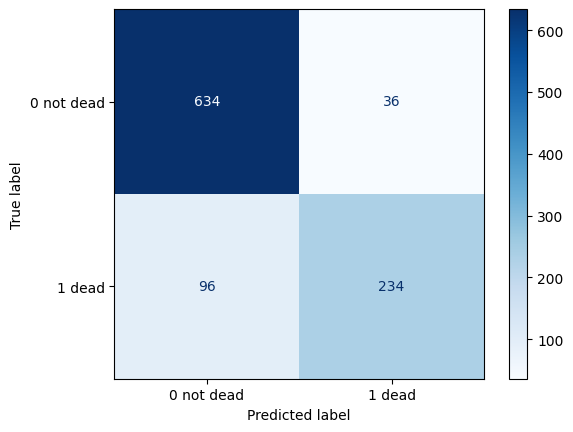

In [ ]:
# 7.3 Evaluate with testing data set
DT_model_testing_prediction=pipe_dt.predict(X_test)
DT_model_testing_acc=accuracy_score(y_test,DT_model_testing_prediction)
DT_model_testing_f1s=f1_score(y_test,DT_model_testing_prediction,pos_label=1)
DT_model_testing_pre=precision_score(y_test,DT_model_testing_prediction,pos_label=1)
DT_model_testing_sen=sensitivity_score(y_test,DT_model_testing_prediction,pos_label=1)
DT_model_testing_spe=specificity_score(y_test,DT_model_testing_prediction,pos_label=1)
DT_model_testing_cm=confusion_matrix(y_test,DT_model_testing_prediction)

#print result
print('Testing ACC:',round(DT_model_testing_acc*100,2))
print('Testing f1s:',round(DT_model_testing_f1s*100,2))
print('Testing pre:',round(DT_model_testing_pre*100,2))
print('Testing sen:',round(DT_model_testing_sen*100,2))
print('Testing spe:',round(DT_model_testing_spe*100,2))
ConfusionMatrixDisplay(DT_model_testing_cm,display_labels=["0 not dead","1 dead"]).plot(cmap=plt.cm.Blues)

## 印出決策樹

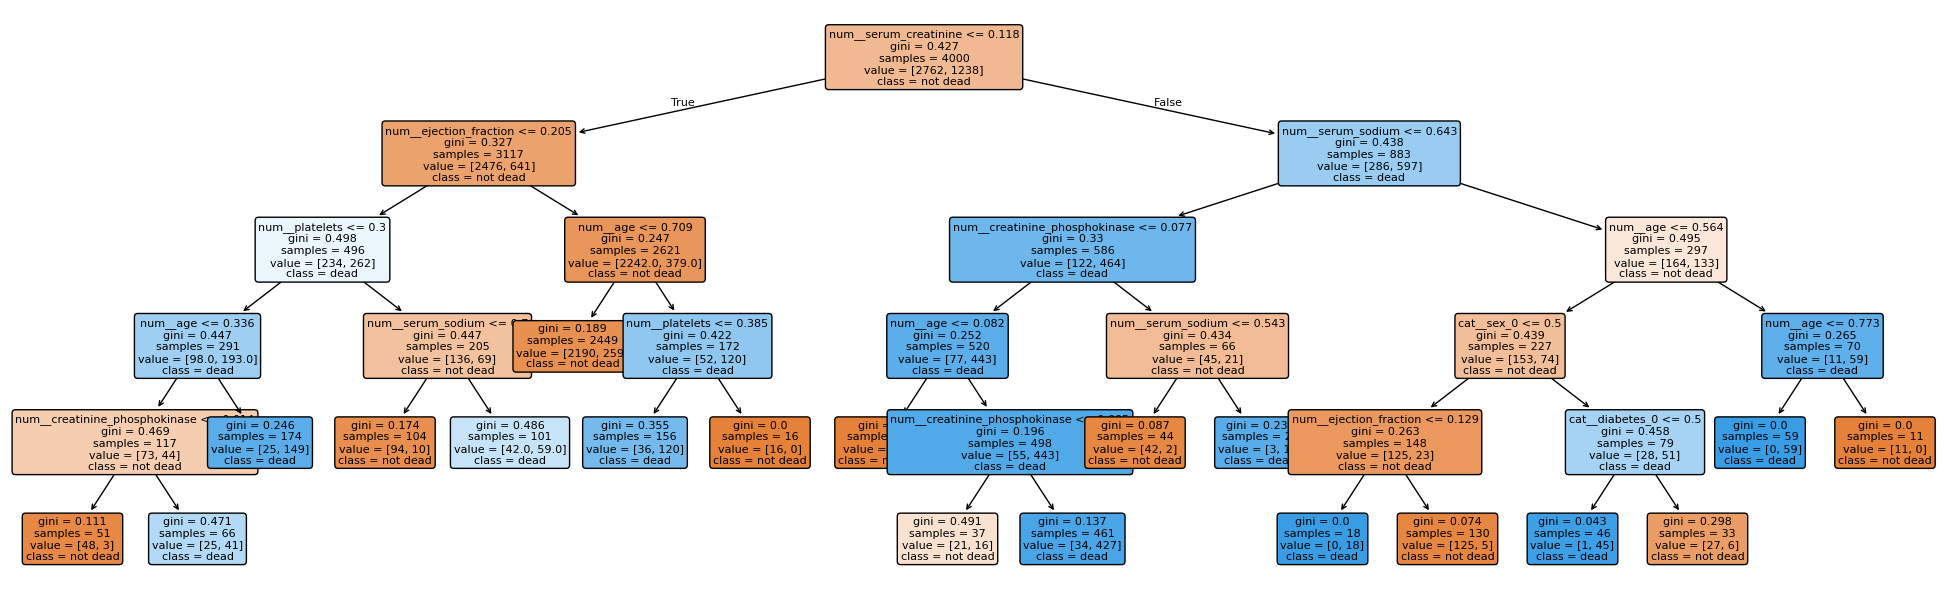

 ccpmodel_max_depth: 5
 ccpmodel_max_leaf_nodes: 19


In [ ]:
# Plot tree
# 假設 'preprocessor' 是你的預處理步驟
from sklearn.compose import ColumnTransformer
from sklearn.tree import plot_tree
preprocessor = pipe_dt.named_steps['preprocessor']

if isinstance(preprocessor, ColumnTransformer):
    # 提取特徵名稱
    feature_names = preprocessor.get_feature_names_out()
else:
    # 如果沒有 ColumnTransformer，直接使用原始特徵名稱
    feature_names = X.columns
decision_tree = pipe_dt.named_steps['clf']
plt.figure(figsize=(25, 7.5))
plot_tree(decision_tree, filled=True, rounded=True, class_names=["not dead", "dead"], feature_names=feature_names, fontsize=8)
plt.show()
print(f" ccpmodel_max_depth: {decision_tree.get_depth()}")
print(f" ccpmodel_max_leaf_nodes: {decision_tree.get_n_leaves()}")

## 繪製學習曲線

In [ ]:
import numpy as np
from sklearn.model_selection import learning_curve

# 設定訓練資料的比例
size = np.linspace(0.1, 1.0, 10)
'''
# 將訓練資料分成 10 等分，從 10% 到 100%
[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
'''

# 計算學習曲線
train_sizes, train_scores, valid_scores = learning_curve(
    estimator=pipe_dt, # 使用管線
    X=X_train, # 訓練資料
    y=y_train, # 訓練標籤
    train_sizes=size, # 訓練資料的比例
    cv=3 # 交叉驗證的次數
)

# 顯示 CV 過程中，的前 5 筆訓練分數
# train_scores[:5, :]
# 計算訓練資料的平均數和標準差
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)

# 顯示驗證資料的平均數和標準差
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

# 顯示驗證資料的平均數
valid_scores_mean

array([0.81975, 0.855  , 0.8475 , 0.862  , 0.857  , 0.87325, 0.87225,
       0.8635 , 0.8725 , 0.86975])

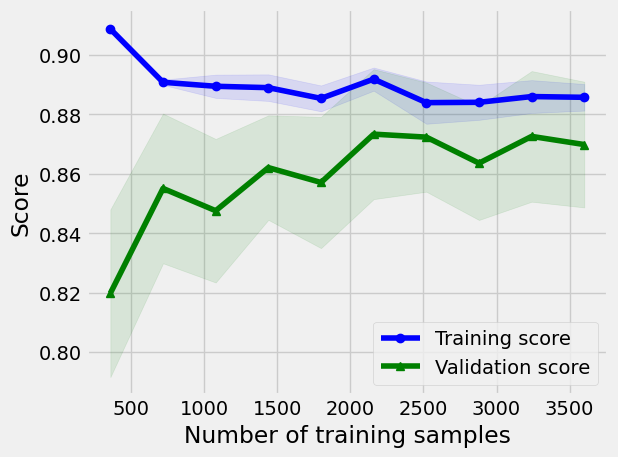

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# 繪製學習曲線
plt.plot(train_sizes,
         train_scores_mean,
         color='blue',
         marker='o',
         label='Training score')

# 填充區域 (訓練分數)
plt.fill_between(train_sizes,
                 train_scores_mean + train_scores_std,
                 train_scores_mean - train_scores_std,
                 color='blue', alpha=.1)

# 繪製驗證曲線
plt.plot(train_sizes, valid_scores_mean,
         color='green', marker='^',
         label='Validation score')


# 填充區域 (驗證分數)
plt.fill_between(train_sizes,
                 valid_scores_mean + valid_scores_std,
                 valid_scores_mean - valid_scores_std,
                 color='green', alpha=.1)

# 加入標題與軸標籤
plt.xlabel('Number of training samples')
plt.ylabel('Score')
plt.legend(loc='lower right')
plt.tight_layout()

# SVM

## kernel='poly'版

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# 建立管線
pipe_poly = Pipeline([
    ('preprocessor', pre),
    ('clf', SVC())
])

# 設定網格搜尋的超參數範圍
C = [1, 2, 4]
degree = [3, 5, 8]
param_grid = [
    {'clf': [SVC()],
     'clf__C': C,
     'clf__degree': degree,
     'clf__kernel': ['poly']}
     ]

# 評估指標為 accuracy
grid_s = GridSearchCV(
    estimator=pipe_poly,
    cv=3,
    param_grid=param_grid,
    scoring='accuracy',
    )
# 訓練模型
grid_s.fit(X_train, y_train)

print('Best score (training):', grid_s.best_score_)
print('Best parameters (training):', grid_s.best_params_)
C = grid_s.best_params_['clf__C']
degree = grid_s.best_params_['clf__degree']
kernel = grid_s.best_params_['clf__kernel']

# 顯示測試資料的準確度
grid_s.score(X_test, y_test)


Best score (training): 0.9574994948137334
Best parameters (training): {'clf': SVC(), 'clf__C': 2, 'clf__degree': 8, 'clf__kernel': 'poly'}


0.957

### 將最佳超參數帶入模型

In [ ]:
pipe_poly = Pipeline([
    ('preprocessor', pre),
    ('clf', SVC(C=C,kernel=kernel,degree=degree))
])
pipe_poly.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('sc',
                                                                   MinMaxScaler())]),
                                                  ['age',
                                                   'creatinine_phosphokinase',
                                                   'ejection_fraction',
                                                   'platelets',
                                                   'serum_creatinine',
                                                   'serum_sodium']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder())]),
                                                  ['anaemia', 'diabetes',
                                                   'high_blood_pressure', 'sex',
                                                   'smoking'])])),
                ('clf', SVC(C=2, degree=8, kernel='poly'))])

### 印出混淆矩陣

Testing ACC: 95.7
Testing f1s: 93.42
Testing pre: 94.43
Testing sen: 92.42
Testing spe: 97.31


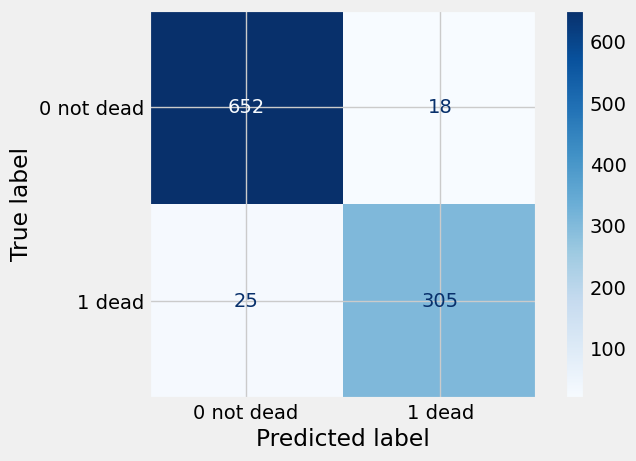

In [ ]:
# 7.3 Evaluate with testing data set
SVM_model_testing_prediction=pipe_poly.predict(X_test)
SVM_model_testing_acc=accuracy_score(y_test,SVM_model_testing_prediction)
SVM_model_testing_f1s=f1_score(y_test,SVM_model_testing_prediction,pos_label=1)
SVM_model_testing_pre=precision_score(y_test,SVM_model_testing_prediction,pos_label=1)
SVM_model_testing_sen=sensitivity_score(y_test,SVM_model_testing_prediction,pos_label=1)
SVM_model_testing_spe=specificity_score(y_test,SVM_model_testing_prediction,pos_label=1)
SVM_model_testing_cm=confusion_matrix(y_test,SVM_model_testing_prediction)

#print result
print('Testing ACC:',round(SVM_model_testing_acc*100,2))
print('Testing f1s:',round(SVM_model_testing_f1s*100,2))
print('Testing pre:',round(SVM_model_testing_pre*100,2))
print('Testing sen:',round(SVM_model_testing_sen*100,2))
print('Testing spe:',round(SVM_model_testing_spe*100,2))
ConfusionMatrixDisplay(SVM_model_testing_cm,display_labels=["0 not dead","1 dead"]).plot(cmap=plt.cm.Blues)

### 繪製學習曲線

In [ ]:
import numpy as np
from sklearn.model_selection import learning_curve

# 設定訓練資料的比例
size = np.linspace(0.1, 1.0, 10)
'''
# 將訓練資料分成 10 等分，從 10% 到 100%
[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
'''

# 計算學習曲線
train_sizes, train_scores, valid_scores = learning_curve(
    estimator=pipe_poly, # 使用管線
    X=X_train, # 訓練資料
    y=y_train, # 訓練標籤
    train_sizes=size, # 訓練資料的比例
    cv=3 # 交叉驗證的次數
)

# 顯示 CV 過程中，的前 5 筆訓練分數
# train_scores[:5, :]
# 計算訓練資料的平均數和標準差
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)

# 顯示驗證資料的平均數和標準差
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

# 顯示驗證資料的平均數
valid_scores_mean

array([0.82325416, 0.88849761, 0.9267478 , 0.93999643, 0.94074568,
       0.94874806, 0.95299781, 0.95424849, 0.95499849, 0.95749949])

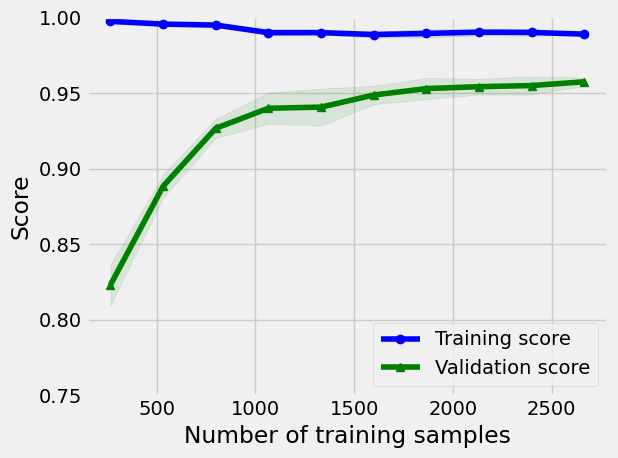

In [ ]:
import matplotlib.pyplot as plt

plt.ylim(0.75, 1)
plt.style.use('fivethirtyeight')

# 繪製學習曲線
plt.plot(train_sizes,
         train_scores_mean,
         color='blue',
         marker='o',
         label='Training score')

# 填充區域 (訓練分數)
plt.fill_between(train_sizes,
                 train_scores_mean + train_scores_std,
                 train_scores_mean - train_scores_std,
                 color='blue', alpha=.1)

# 繪製驗證曲線
plt.plot(train_sizes, valid_scores_mean,
         color='green', marker='^',
         label='Validation score')


# 填充區域 (驗證分數)
plt.fill_between(train_sizes,
                 valid_scores_mean + valid_scores_std,
                 valid_scores_mean - valid_scores_std,
                 color='green', alpha=.1)

# 加入標題與軸標籤
plt.xlabel('Number of training samples')
plt.ylabel('Score')
plt.legend(loc='lower right')
plt.tight_layout()

### 計算AUC

In [ ]:
y_score = pipe_poly.decision_function(X_test)
from sklearn.metrics import roc_curve, auc

# 計算 ROC 曲線
fpr, tpr, _ = roc_curve(y_test, y_score)
'''
fpr = False Positive Rate
tpr = True Positive Rate
_ = Thresholds
'''
# 計算 AUC 值
roc_auc = auc(fpr, tpr)
# roc_auc

### 繪製ROC

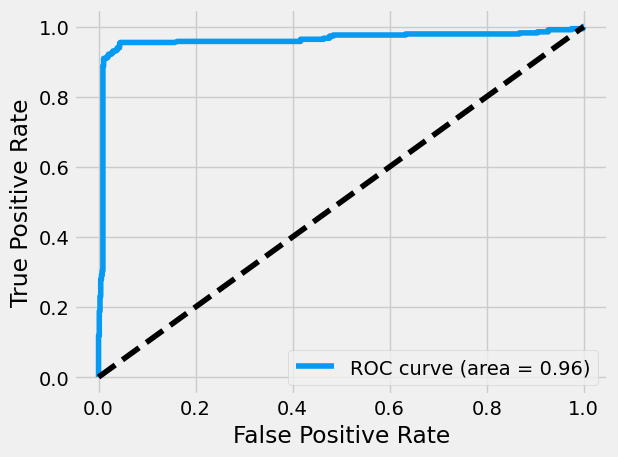

In [ ]:
# 繪製 ROC 曲線
plt.plot(fpr, tpr, color='xkcd:azure',
         label=f'ROC curve (area = {roc_auc:.2f})' )

# 繪製對角線
plt.plot([0, 1], [0, 1], color='black', linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.tight_layout()


## kernel='rbf'版

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV


# 建立管線
pipe_rbf = Pipeline([
    ('preprocessor', pre),
    ('clf', SVC())
])

# 設定網格搜尋的超參數範圍
C = [1, 2, 4]
degree = [3, 5, 8]
param_grid = [
    {'clf': [SVC()],
     'clf__C': C,
     'clf__degree': degree,
     'clf__kernel': ['rbf']}
     ]

# 評估指標為 accuracy
grid_s = GridSearchCV(
    estimator=pipe_rbf,
    cv=3,
    param_grid=param_grid,
    scoring='accuracy',
    )
# 訓練模型
grid_s.fit(X_train, y_train)

print('Best score (training):', grid_s.best_score_)
print('Best parameters (training):', grid_s.best_params_)

C = grid_s.best_params_['clf__C']
degree = grid_s.best_params_['clf__degree']
kernel = grid_s.best_params_['clf__kernel']

# 顯示測試資料的準確度
grid_s.score(X_test, y_test)

Best score (training): 0.8619960462379463
Best parameters (training): {'clf': SVC(), 'clf__C': 4, 'clf__degree': 3, 'clf__kernel': 'rbf'}


0.863

### 將最佳超參數帶入模型

In [ ]:
pipe_rbf = Pipeline([
    ('preprocessor', pre),
    ('clf', SVC(C=C,kernel=kernel,degree=degree))
])
pipe_rbf.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('sc',
                                                                   MinMaxScaler())]),
                                                  ['age',
                                                   'creatinine_phosphokinase',
                                                   'ejection_fraction',
                                                   'platelets',
                                                   'serum_creatinine',
                                                   'serum_sodium']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder())]),
                                                  ['anaemia', 'diabetes',
                                                   'high_blood_pressure', 'sex',
                                                   'smoking'])])),
                ('clf', SVC(C=4))])

### 印出混淆矩陣

Testing ACC: 86.3
Testing f1s: 77.72
Testing pre: 83.86
Testing sen: 72.42
Testing spe: 93.13


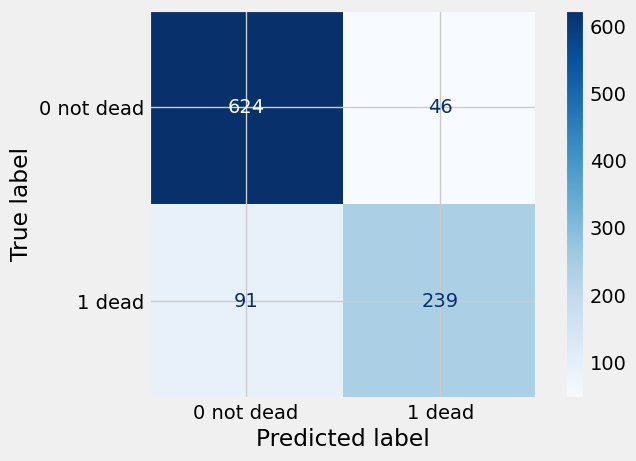

In [ ]:
# 7.3 Evaluate with testing data set
SVM_model_testing_prediction=pipe_rbf.predict(X_test)
SVM_model_testing_acc=accuracy_score(y_test,SVM_model_testing_prediction)
SVM_model_testing_f1s=f1_score(y_test,SVM_model_testing_prediction,pos_label=1)
SVM_model_testing_pre=precision_score(y_test,SVM_model_testing_prediction,pos_label=1)
SVM_model_testing_sen=sensitivity_score(y_test,SVM_model_testing_prediction,pos_label=1)
SVM_model_testing_spe=specificity_score(y_test,SVM_model_testing_prediction,pos_label=1)
SVM_model_testing_cm=confusion_matrix(y_test,SVM_model_testing_prediction)

#print result
print('Testing ACC:',round(SVM_model_testing_acc*100,2))
print('Testing f1s:',round(SVM_model_testing_f1s*100,2))
print('Testing pre:',round(SVM_model_testing_pre*100,2))
print('Testing sen:',round(SVM_model_testing_sen*100,2))
print('Testing spe:',round(SVM_model_testing_spe*100,2))
ConfusionMatrixDisplay(SVM_model_testing_cm,display_labels=["0 not dead","1 dead"]).plot(cmap=plt.cm.Blues)

### 繪製學習曲線

In [ ]:
import numpy as np
from sklearn.model_selection import learning_curve

# 設定訓練資料的比例
size = np.linspace(0.1, 1.0, 10)
'''
# 將訓練資料分成 10 等分，從 10% 到 100%
[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
'''

# 計算學習曲線
train_sizes, train_scores, valid_scores = learning_curve(
    estimator=pipe_rbf, # 使用管線
    X=X_train, # 訓練資料
    y=y_train, # 訓練標籤
    train_sizes=size, # 訓練資料的比例
    cv=3 # 交叉驗證的次數
)

# 顯示 CV 過程中，的前 5 筆訓練分數
# train_scores[:5, :]
# 計算訓練資料的平均數和標準差
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)

# 顯示驗證資料的平均數和標準差
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

# 顯示驗證資料的平均數
valid_scores_mean

array([0.7737431 , 0.7967451 , 0.81774735, 0.82574823, 0.84524673,
       0.84099811, 0.84324717, 0.85499786, 0.85749904, 0.86199605])

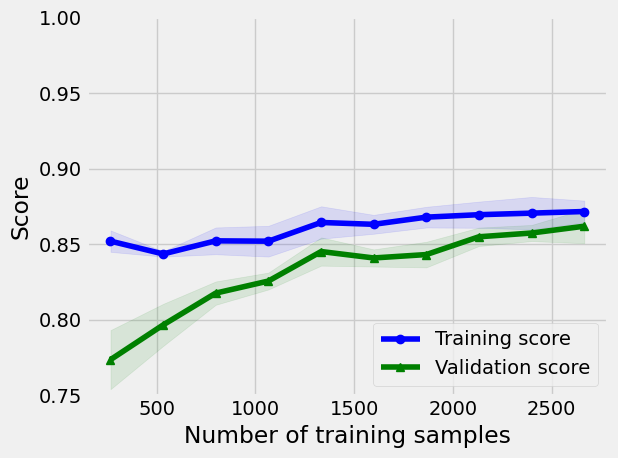

In [ ]:
import matplotlib.pyplot as plt

plt.ylim(0.75, 1)

plt.style.use('fivethirtyeight')

# 繪製學習曲線
plt.plot(train_sizes,
         train_scores_mean,
         color='blue',
         marker='o',
         label='Training score')

# 填充區域 (訓練分數)
plt.fill_between(train_sizes,
                 train_scores_mean + train_scores_std,
                 train_scores_mean - train_scores_std,
                 color='blue', alpha=.1)

# 繪製驗證曲線
plt.plot(train_sizes, valid_scores_mean,
         color='green', marker='^',
         label='Validation score')


# 填充區域 (驗證分數)
plt.fill_between(train_sizes,
                 valid_scores_mean + valid_scores_std,
                 valid_scores_mean - valid_scores_std,
                 color='green', alpha=.1)

# 加入標題與軸標籤
plt.xlabel('Number of training samples')
plt.ylabel('Score')
plt.legend(loc='lower right')
plt.tight_layout()

### 計算AUC

In [ ]:
y_score = pipe_rbf.decision_function(X_test)
from sklearn.metrics import roc_curve, auc

# 計算 ROC 曲線
fpr, tpr, _ = roc_curve(y_test, y_score)
'''
fpr = False Positive Rate
tpr = True Positive Rate
_ = Thresholds
'''
# 計算 AUC 值
roc_auc = auc(fpr, tpr)
# roc_auc

### 繪製ROC

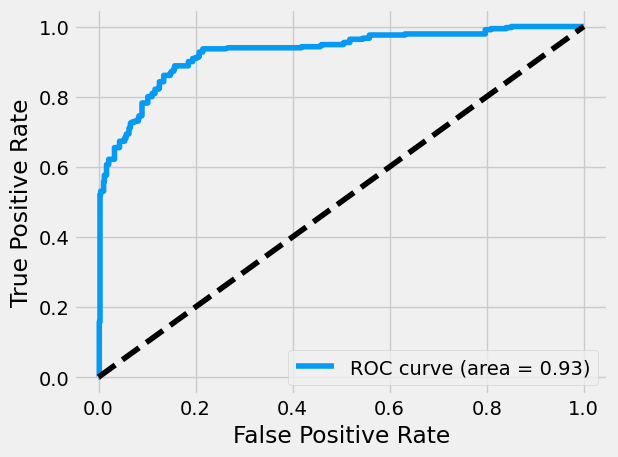

In [ ]:
# 繪製 ROC 曲線
plt.plot(fpr, tpr, color='xkcd:azure',
         label=f'ROC curve (area = {roc_auc:.2f})' )

# 繪製對角線
plt.plot([0, 1], [0, 1], color='black', linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.tight_layout()


# KNN

## weights='uniform'版(原本的預設)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# 建立管線
pipe_uni = Pipeline([
    ('preprocessor', pre),
    ('clf', KNeighborsClassifier())
])

# 設定網格搜尋的超參數範圍
n_neighbors = [3, 5, 7]
param_grid = [
    {'clf': [KNeighborsClassifier()],
     'clf__n_neighbors': n_neighbors,
     'clf__weights': ['uniform']}]

# 評估指標為 accuracy
grid_s = GridSearchCV(
    estimator=pipe_uni,
    cv=3,
    param_grid=param_grid,
    scoring='accuracy',
    )
# 訓練模型
grid_s.fit(X_train, y_train)

print('Best score (training):', grid_s.best_score_)
print('Best parameters (training):', grid_s.best_params_)
n_neighbors = grid_s.best_params_['clf__n_neighbors']
weights = grid_s.best_params_['clf__weights']
# 顯示測試資料的準確度
grid_s.score(X_test, y_test)

Best score (training): 0.9637499329854952
Best parameters (training): {'clf': KNeighborsClassifier(), 'clf__n_neighbors': 3, 'clf__weights': 'uniform'}


0.958

### 將最佳超參數帶入模型

In [ ]:
pipe_uni = Pipeline([
    ('preprocessor', pre),
    ('clf', KNeighborsClassifier(n_neighbors=n_neighbors,weights=weights))
])
pipe_uni.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('sc',
                                                                   MinMaxScaler())]),
                                                  ['age',
                                                   'creatinine_phosphokinase',
                                                   'ejection_fraction',
                                                   'platelets',
                                                   'serum_creatinine',
                                                   'serum_sodium']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder())]),
                                                  ['anaemia', 'diabetes',
                                                   'high_blood_pressure', 'sex',
                                                   'smoking'])])),
                ('clf', KNeighborsClassifier(n_neighbors=3))])

### 印出混淆矩陣

Testing ACC: 95.8
Testing f1s: 93.5
Testing pre: 95.57
Testing sen: 91.52
Testing spe: 97.91


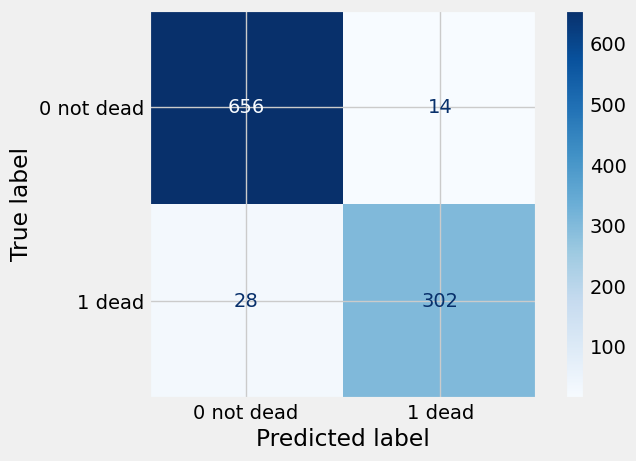

In [ ]:
# 7.3 Evaluate with testing data set
KNN_model_testing_prediction=pipe_uni.predict(X_test)
KNN_model_testing_acc=accuracy_score(y_test,KNN_model_testing_prediction)
KNN_model_testing_f1s=f1_score(y_test,KNN_model_testing_prediction,pos_label=1)
KNN_model_testing_pre=precision_score(y_test,KNN_model_testing_prediction,pos_label=1)
KNN_model_testing_sen=sensitivity_score(y_test,KNN_model_testing_prediction,pos_label=1)
KNN_model_testing_spe=specificity_score(y_test,KNN_model_testing_prediction,pos_label=1)
KNN_model_testing_cm=confusion_matrix(y_test,KNN_model_testing_prediction)

#print result
print('Testing ACC:',round(KNN_model_testing_acc*100,2))
print('Testing f1s:',round(KNN_model_testing_f1s*100,2))
print('Testing pre:',round(KNN_model_testing_pre*100,2))
print('Testing sen:',round(KNN_model_testing_sen*100,2))
print('Testing spe:',round(KNN_model_testing_spe*100,2))
ConfusionMatrixDisplay(KNN_model_testing_cm,display_labels=["0 not dead","1 dead"]).plot(cmap=plt.cm.Blues)

### 繪製學習曲線

In [ ]:
import numpy as np
from sklearn.model_selection import learning_curve

# 設定訓練資料的比例
size = np.linspace(0.1, 1.0, 10)
'''
# 將訓練資料分成 10 等分，從 10% 到 100%
[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
'''

# 計算學習曲線
train_sizes, train_scores, valid_scores = learning_curve(
    estimator=pipe_uni, # 使用管線
    X=X_train, # 訓練資料
    y=y_train, # 訓練標籤
    train_sizes=size, # 訓練資料的比例
    cv=3 # 交叉驗證的次數
)

# 顯示 CV 過程中，的前 5 筆訓練分數
# train_scores[:5, :]
# 計算訓練資料的平均數和標準差
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)

# 顯示驗證資料的平均數和標準差
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

# 顯示驗證資料的平均數
valid_scores_mean

array([0.77425372, 0.84325673, 0.86999973, 0.90375143, 0.92274737,
       0.93924699, 0.95150043, 0.95649906, 0.96024962, 0.96374993])

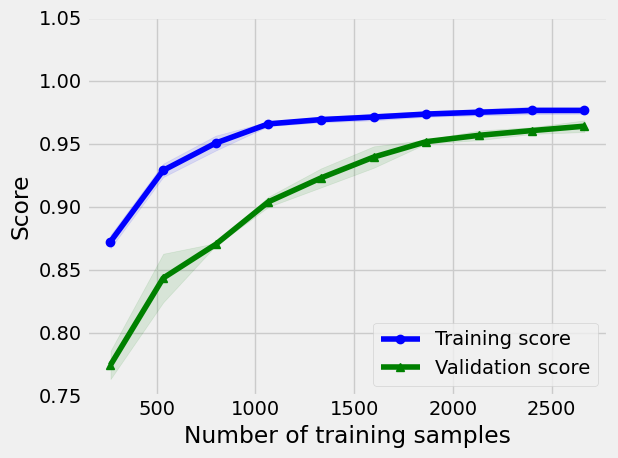

In [ ]:
import matplotlib.pyplot as plt

plt.ylim(0.75, 1.05)
plt.style.use('fivethirtyeight')

# 繪製學習曲線
plt.plot(train_sizes,
         train_scores_mean,
         color='blue',
         marker='o',
         label='Training score')

# 填充區域 (訓練分數)
plt.fill_between(train_sizes,
                 train_scores_mean + train_scores_std,
                 train_scores_mean - train_scores_std,
                 color='blue', alpha=.1)

# 繪製驗證曲線
plt.plot(train_sizes, valid_scores_mean,
         color='green', marker='^',
         label='Validation score')


# 填充區域 (驗證分數)
plt.fill_between(train_sizes,
                 valid_scores_mean + valid_scores_std,
                 valid_scores_mean - valid_scores_std,
                 color='green', alpha=.1)

# 加入標題與軸標籤
plt.xlabel('Number of training samples')
plt.ylabel('Score')
plt.legend(loc='lower right')
plt.tight_layout()

### 計算AUC

In [ ]:
y_score = pipe_uni.predict_proba(X_test)
from sklearn.metrics import roc_curve, auc

# 計算 ROC 曲線
fpr, tpr, threshold = roc_curve(y_test, y_score[:, 1])
'''
fpr = False Positive Rate
tpr = True Positive Rate
_ = Thresholds
'''
# 計算 AUC 值
roc_auc = auc(fpr, tpr)
# roc_auc

### 繪製ROC

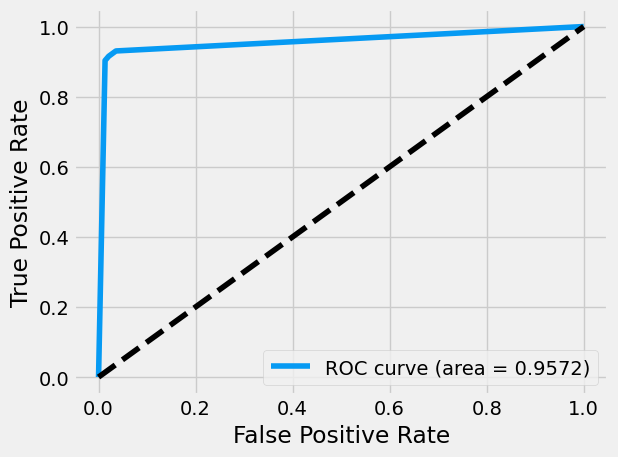

In [ ]:
# 繪製 ROC 曲線
plt.plot(fpr, tpr, color='xkcd:azure',
         label=f'ROC curve (area = {roc_auc:.4f})' )

# 繪製對角線
plt.plot([0, 1], [0, 1], color='black', linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.tight_layout()

## weights='distance'版

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# 建立管線
pipe_dis = Pipeline([
    ('preprocessor', pre),
    ('clf', KNeighborsClassifier())
])

# 設定網格搜尋的超參數範圍
n_neighbors = [3, 5, 7]
param_grid = [
    {'clf': [KNeighborsClassifier()],
     'clf__n_neighbors': n_neighbors,
     'clf__weights': ['distance']}]

# 評估指標為 accuracy
grid_s = GridSearchCV(
    estimator=pipe_dis,
    cv=3,
    param_grid=param_grid,
    scoring='accuracy',
    )
# 訓練模型
grid_s.fit(X_train, y_train)

print('Best score (training):', grid_s.best_score_)
print('Best parameters (training):', grid_s.best_params_)

n_neighbors = grid_s.best_params_['clf__n_neighbors']
weights = grid_s.best_params_['clf__weights']
# 顯示測試資料的準確度
grid_s.score(X_test, y_test)

Best score (training): 0.9670005582355109
Best parameters (training): {'clf': KNeighborsClassifier(), 'clf__n_neighbors': 3, 'clf__weights': 'distance'}


0.963

### 將最佳超參數帶入模型

In [ ]:
pipe_dis = Pipeline([
    ('preprocessor', pre),
    ('clf', KNeighborsClassifier(n_neighbors=n_neighbors,weights=weights))
])
pipe_dis.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('sc',
                                                                   MinMaxScaler())]),
                                                  ['age',
                                                   'creatinine_phosphokinase',
                                                   'ejection_fraction',
                                                   'platelets',
                                                   'serum_creatinine',
                                                   'serum_sodium']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder())]),
                                                  ['anaemia', 'diabetes',
                                                   'high_blood_pressure', 'sex',
                                                   'smoking'])])),
                ('clf',
                 KNeighborsClassifier(n_neighbors=3, weights='distance'))])

### 印出混淆矩陣

Testing ACC: 96.3
Testing f1s: 94.28
Testing pre: 96.21
Testing sen: 92.42
Testing spe: 98.21


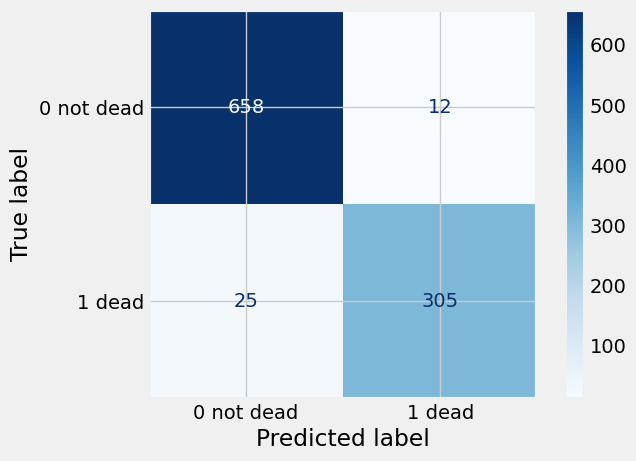

In [ ]:
# 7.3 Evaluate with testing data set
KNN_model_testing_prediction=pipe_dis.predict(X_test)
KNN_model_testing_acc=accuracy_score(y_test,KNN_model_testing_prediction)
KNN_model_testing_f1s=f1_score(y_test,KNN_model_testing_prediction,pos_label=1)
KNN_model_testing_pre=precision_score(y_test,KNN_model_testing_prediction,pos_label=1)
KNN_model_testing_sen=sensitivity_score(y_test,KNN_model_testing_prediction,pos_label=1)
KNN_model_testing_spe=specificity_score(y_test,KNN_model_testing_prediction,pos_label=1)
KNN_model_testing_cm=confusion_matrix(y_test,KNN_model_testing_prediction)

#print result
print('Testing ACC:',round(KNN_model_testing_acc*100,2))
print('Testing f1s:',round(KNN_model_testing_f1s*100,2))
print('Testing pre:',round(KNN_model_testing_pre*100,2))
print('Testing sen:',round(KNN_model_testing_sen*100,2))
print('Testing spe:',round(KNN_model_testing_spe*100,2))
ConfusionMatrixDisplay(KNN_model_testing_cm,display_labels=["0 not dead","1 dead"]).plot(cmap=plt.cm.Blues)

### 繪製學習曲線

In [ ]:
import numpy as np
from sklearn.model_selection import learning_curve

# 設定訓練資料的比例
size = np.linspace(0.1, 1.0, 10)
'''
# 將訓練資料分成 10 等分，從 10% 到 100%
[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
'''

# 計算學習曲線
train_sizes, train_scores, valid_scores = learning_curve(
    estimator=pipe_dis, # 使用管線
    X=X_train, # 訓練資料
    y=y_train, # 訓練標籤
    train_sizes=size, # 訓練資料的比例
    cv=3 # 交叉驗證的次數
)

# 顯示 CV 過程中，的前 5 筆訓練分數
# train_scores[:5, :]
# 計算訓練資料的平均數和標準差
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)

# 顯示驗證資料的平均數和標準差
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

# 顯示驗證資料的平均數
valid_scores_mean

array([0.83050485, 0.88850099, 0.91225018, 0.93424949, 0.94749756,
       0.95949981, 0.96449975, 0.96424968, 0.96524993, 0.96700056])

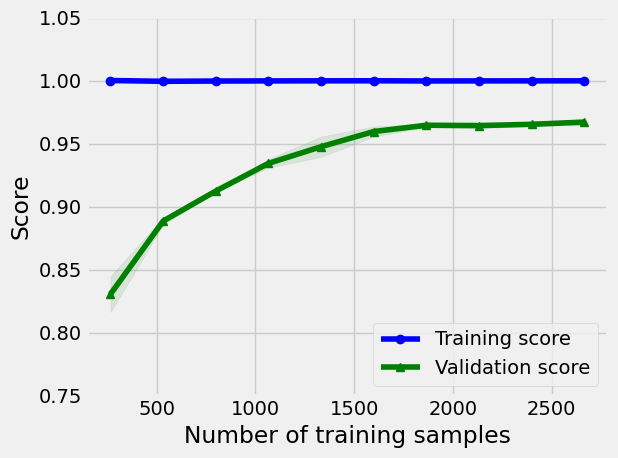

In [ ]:
import matplotlib.pyplot as plt
plt.ylim(0.75, 1.05)
plt.style.use('fivethirtyeight')

# 繪製學習曲線
plt.plot(train_sizes,
         train_scores_mean,
         color='blue',
         marker='o',
         label='Training score')

# 填充區域 (訓練分數)
plt.fill_between(train_sizes,
                 train_scores_mean + train_scores_std,
                 train_scores_mean - train_scores_std,
                 color='blue', alpha=.1)

# 繪製驗證曲線
plt.plot(train_sizes, valid_scores_mean,
         color='green', marker='^',
         label='Validation score')


# 填充區域 (驗證分數)
plt.fill_between(train_sizes,
                 valid_scores_mean + valid_scores_std,
                 valid_scores_mean - valid_scores_std,
                 color='green', alpha=.1)

# 加入標題與軸標籤
plt.xlabel('Number of training samples')
plt.ylabel('Score')
plt.legend(loc='lower right')
plt.tight_layout()

### 計算AUC

In [ ]:
y_score = pipe_dis.predict_proba(X_test)
from sklearn.metrics import roc_curve, auc
# 計算 ROC 曲線
fpr, tpr, threshold = roc_curve(y_test, y_score[:, 1])
'''
fpr = False Positive Rate
tpr = True Positive Rate
_ = Thresholds
'''
# 計算 AUC 值
roc_auc = auc(fpr, tpr)
# roc_auc

### 繪製ROC

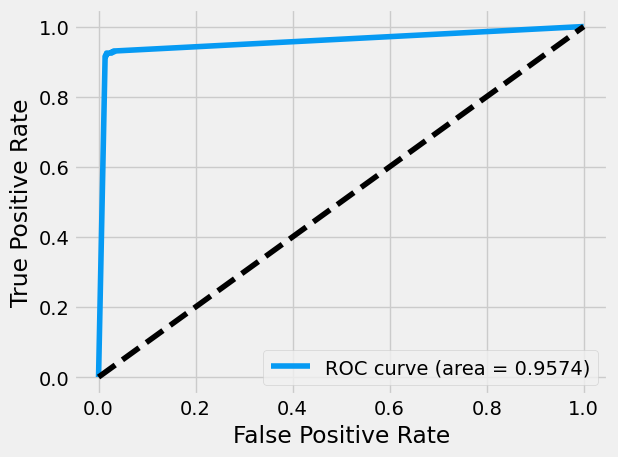

In [ ]:
# 繪製 ROC 曲線
plt.plot(fpr, tpr, color='xkcd:azure',
         label=f'ROC curve (area = {roc_auc:.4f})' )

# 繪製對角線
plt.plot([0, 1], [0, 1], color='black', linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.tight_layout()

# 同時用多個模型來調整超參數，找出最佳模型

In [ ]:
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

from sklearn.compose import ColumnTransformer

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split, GridSearchCV
import pandas as pd
import numpy as np

# 確保隨機性可控
np.random.seed(6)

# 處理數值型特徵
num_features = ['age', 'creatinine_phosphokinase', 'ejection_fraction','platelets','serum_creatinine', 'serum_sodium']
num_transform = Pipeline([
    # ('sc', StandardScaler())
    ('sc', MinMaxScaler())
])

# 處理類別型特徵
cat_features = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']
cat_transform = Pipeline([
    ('onehot', OneHotEncoder())
])

# 整合數值與類別特徵的處理步驟
pre = ColumnTransformer(
    transformers=[
        ('num', num_transform, num_features),
        ('cat', cat_transform, cat_features)
    ]
)

# 準備數據
X, y = df.loc[:, 'age':'smoking'], df['DEATH_EVENT']

# 切分訓練與測試數據
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6)

# 定義管線
pipe = Pipeline([
    ('preprocessor', pre),
    ('clf', DecisionTreeClassifier())
])

# 設定網格搜尋的超參數範圍
max_depth = range(1,20)
max_leaf_nodes = range(1,20)
C = [1, 2, 4]
degree = [3, 5, 8]
n_neighbors = [3, 5, 7]
param_grid = [
    {'clf': [DecisionTreeClassifier()],
     'clf__criterion': ['gini', 'entropy'],
     'clf__max_depth': max_depth,
     'clf__max_leaf_nodes': max_leaf_nodes},
    {'clf': [SVC()],
     'clf__C': C,
     'clf__degree': degree,
     'clf__kernel': ['poly', 'rbf']},
    {'clf': [KNeighborsClassifier()],
     'clf__n_neighbors': n_neighbors,
     'clf__weights': ['uniform', 'distance']}
]

# 進行網格搜尋
grid_s = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    scoring='accuracy',
    cv=3
)

# 訓練模型
grid_s.fit(X_train, y_train)

# 顯示最佳分數與參數
print('Best score (training):', grid_s.best_score_)
print('Best parameters (training):', grid_s.best_params_)
print('Test accuracy:', grid_s.score(X_test, y_test))

# 提取每個模型的最佳結果
results = pd.DataFrame(grid_s.cv_results_)
for i, param_set in enumerate(param_grid):
    clf_name = param_set['clf'][0].__class__.__name__
    model_results = results[results['param_clf'].apply(lambda x: isinstance(x, param_set['clf'][0].__class__))]
    best_index = model_results['mean_test_score'].idxmax()
    best_score = model_results.loc[best_index, 'mean_test_score']
    best_params = model_results.loc[best_index, 'params']
    print(f"Model: {clf_name}")
    print(f"  Best Score: {best_score:.4f}")
    print(f"  Best Parameters: {best_params}")

Best score (training): 0.9670005582355109
Best parameters (training): {'clf': KNeighborsClassifier(), 'clf__n_neighbors': 3, 'clf__weights': 'distance'}
Test accuracy: 0.963
Model: DecisionTreeClassifier
  Best Score: 0.8833
  Best Parameters: {'clf': DecisionTreeClassifier(), 'clf__criterion': 'gini', 'clf__max_depth': 7, 'clf__max_leaf_nodes': 19}
Model: SVC
  Best Score: 0.9575
  Best Parameters: {'clf': SVC(), 'clf__C': 2, 'clf__degree': 8, 'clf__kernel': 'poly'}
Model: KNeighborsClassifier
  Best Score: 0.9670
  Best Parameters: {'clf': KNeighborsClassifier(), 'clf__n_neighbors': 3, 'clf__weights': 'distance'}


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
114 fits failed out of a total of 2238.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
114 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 660, in fit
    self._final_estimator.fit(Xt, y, **last_step_params["fit"])
  File "/usr/local/lib/

# 集成學習

## boosting

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

# 建立模型
models = {
    'Decision Tree': DecisionTreeClassifier(max_depth=7),
    'AdaBoost': AdaBoostClassifier(
        n_estimators=50,
        random_state=0
    )
}

# 儲存分數
scores = {}

# 比較模型的表現
for name, clf in models.items():
    # 訓練模型
    clf.fit(X_train, y_train)

    # 計算分數
    scores[(name, 'Train score')] = clf.score(X_train, y_train)
    scores[(name, 'Test score')] = clf.score(X_test, y_test)

# 顯示分數
pd.Series(scores).unstack()

,Test score,Train score
AdaBoost,0.797,0.81075
Decision Tree,0.920,0.93400


## Stacking

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

# 建立模型
clf1 = KNeighborsClassifier(n_neighbors=3)
clf2 = DecisionTreeClassifier(max_depth=7, random_state=6)
clf3 = SVC()

# 以 LogisticRegression 為最終分類器
lr = LogisticRegression()

# 建立三個模型的堆疊模型
estimators = [
    ('KNN', clf1),
    ('DecisionTree', clf2),
    ('SVM', clf3)
]
# 建立堆疊模型
sclf = StackingClassifier(
    estimators=estimators, # 三個模型
    final_estimator=lr, # 最終分類器
    n_jobs=-1
)
# 設定模型名稱
titles = (
    'KNN',
    'DecisionTree',
    'SVM',
    'Stacking')

# 整理模型
models = (clf1, clf2, clf3, sclf)

# 訓練模型
models = [clf.fit(X_train, y_train) for clf in models]

# 記錄分數
scores = {}

# 計算分數
for clf, title in zip(models, titles):
    scores[(title, 'Train score')] = clf.score(X_train, y_train)
    scores[(title, 'Test score')] = clf.score(X_test, y_test)

# 顯示分數
pd.Series(scores).unstack()

,Test score,Train score
DecisionTree,0.818,0.83475
KNN,0.951,0.96675
SVM,0.670,0.69050
Stacking,0.963,0.98125


In [ ]:
# 顯示權重
for i, est in enumerate(estimators):
    # 顯示權重
    print(est[0], '的權重 =', sclf.final_estimator_.coef_[0][i])

KNN 的權重 = 5.153029402069266
DecisionTree 的權重 = 4.7918167670072185
SVM 的權重 = -0.04111368464135721


In [ ]:
# 繪製學習曲線
import numpy as np
from sklearn.model_selection import learning_curve

# 設定參數
train_sizes, train_scores, test_scores = learning_curve(
    estimator=sclf,
    X=X_train,
    y=y_train,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=3,
    n_jobs=-1
)

# 計算平均值與標準差
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

test_mean

array([0.80750585, 0.8697478 , 0.9034993 , 0.92400087, 0.94324968,
       0.94524943, 0.95525043, 0.95950074, 0.96000106, 0.96250037])

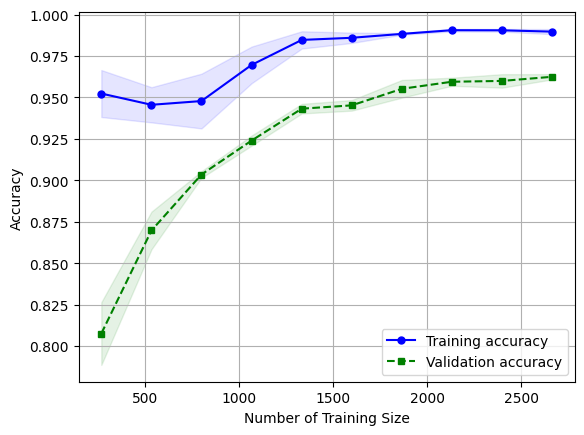

In [ ]:
import matplotlib.pyplot as plt

# 繪製 Training accuracy 的學習曲線
plt.plot(
    train_sizes,
    train_mean,
    color='blue',
    marker='o',
    markersize=5,
    label='Training accuracy'
)

# 繪製訓練分數的平均值加/減標準差的區域
plt.fill_between(
    train_sizes,
    train_mean + train_std,
    train_mean - train_std,
    alpha=0.1,
    color='blue'
)

# 繪製 Validation accuracy 的學習曲線
plt.plot(
    train_sizes,
    test_mean,
    color='green',
    ls='--',
    marker='s',
    markersize=5,
    label='Validation accuracy'
)

# 繪製驗證分數平均值加/減標準差的區域
plt.fill_between(
    train_sizes,
    test_mean + test_std,
    test_mean - test_std,
    alpha=0.1,
    color='green'
)

# 加入圖例
plt.grid()
plt.xlabel('Number of Training Size')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
import pandas as pd
import numpy as np

from sklearn.ensemble import AdaBoostRegressor

# 確保隨機性可控
np.random.seed(6)

# 處理數值型特徵
num_features = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium']
num_transform = Pipeline([
    ('sc', MinMaxScaler())
])

# 處理類別型特徵
cat_features = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']
cat_transform = Pipeline([
    ('onehot', OneHotEncoder())
])

# 整合數值與類別特徵的處理步驟
pre = ColumnTransformer(
    transformers=[
        ('num', num_transform, num_features),
        ('cat', cat_transform, cat_features)
    ]
)

# 準備數據
X, y = df.loc[:, 'age':'smoking'], df['DEATH_EVENT']

# 切分訓練與測試數據
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6)

# 定義基學習器
base_clf = DecisionTreeClassifier(max_depth=3)

# 定義集成學習模型 (Boosting)
boosting_clf = AdaBoostClassifier(
    estimator=base_clf,
    n_estimators=50,
    learning_rate=1.0,
    algorithm='SAMME.R'
)

# 定義管線
pipe = Pipeline([
    ('preprocessor', pre),
    ('boosting_clf', boosting_clf)
])

# 定義超參數網格
param_grid = {
    'boosting_clf__estimator__max_depth': [3, 5, 7],
    'boosting_clf__n_estimators': [10, 50, 100],
    'boosting_clf__learning_rate': [0.01, 0.1, 1.0]
}

# 進行網格搜尋
grid_s = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    scoring='accuracy',
    cv=3
)

# 訓練模型
grid_s.fit(X_train, y_train)

# 顯示最佳分數與參數
print('Best score (training):', grid_s.best_score_)
print('Best parameters (training):', grid_s.best_params_)
print('Test accuracy:', grid_s.score(X_test, y_test))

# 提取每個模型的最佳結果
results = pd.DataFrame(grid_s.cv_results_)
print(results[['param_boosting_clf__estimator__max_depth', 'param_boosting_clf__n_estimators', 'param_boosting_clf__learning_rate', 'mean_test_score']])



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

Best score (training): 0.9872505607661286
Best parameters (training): {'boosting_clf__estimator__max_depth': 7, 'boosting_clf__learning_rate': 1.0, 'boosting_clf__n_estimators': 100}
Test accuracy: 0.985
    param_boosting_clf__estimator__max_depth  \
0                                          3   
1                                          3   
2                                          3   
3                                          3   
4                                          3   
5                                          3   
6                                          3   
7                                          3   
8                                          3   
9                                          5   
10                                         5   
11                                         5   
12                                         5   
13                                         5   
14                                         5   
15                          

In [ ]:
pipe

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('sc',
                                                                   MinMaxScaler())]),
                                                  ['age',
                                                   'creatinine_phosphokinase',
                                                   'ejection_fraction',
                                                   'platelets',
                                                   'serum_creatinine',
                                                   'serum_sodium']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder())]),
                                                  ['anaemia', 'diabetes',
                                                   'high_blood_pressure', 'sex',
                                                   'smoking'])])),
                ('boosting_clf',
                 AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3)))])